# ML Project  - Learning about Hit Songs

## Laura Viola, Chiara Pellico, David Ribeiro (2021)

# Import Data

## Import libraries

In [1]:
import sys
!{sys.executable} -m pip install pydot
import sys
!{sys.executable} -m pip install graphviz
import sys
!{sys.executable} -m pip install mlxtend
import sys
!{sys.executable} -m pip install category_encoders
import sys
!{sys.executable} -m pip install scipy

In [2]:
pip install -U imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import statistics
import pickle
from statistics import mean
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydot
import graphviz
import category_encoders as ce

## Import dataset as a dataframe

In [5]:
data = pd.read_csv("Spotify_dataset.csv")

In [6]:
data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840,4,53.89523,6,90s,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,90s,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267,4,42.05369,9,90s,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933,4,80.99693,10,90s,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653,4,25.57331,20,90s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,Born with the Blues,Buster Benton,spotify:track:2ZARTKpOvYYuR2DxcTjxQo,0.373,0.417,9,-12.273,0,0.0934,0.858000,0.462000,0.0425,0.588,174.359,289653,3,36.12884,14,70s,0
41102,Farther On Down The Road,Joe Simon,spotify:track:1Fj16GGVNFdPut4SFG2vvp,0.470,0.490,2,-11.630,1,0.0915,0.064900,0.000001,0.0574,0.644,176.523,187067,4,33.41380,9,70s,1
41103,Sweetheart,Engelbert Humperdinck,spotify:track:6zm0XoxnzzdFeXeYGE8gFh,0.253,0.550,2,-7.743,1,0.0305,0.155000,0.000021,0.0786,0.643,100.011,183613,4,22.28247,12,70s,1
41104,Until It's Time For You To Go,Neil Diamond,spotify:track:6fsAxEHvbVPU8pVPnBXaX2,0.419,0.124,0,-21.666,1,0.0340,0.800000,0.000100,0.1310,0.178,91.439,211440,3,19.82409,10,70s,1


## Data description


* **track** - The Name of the track.
* **artist** - The Name of the Artist.
* **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
* **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
* **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
* **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
* **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
* **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* **duration_ms** - The duration of the track in milliseconds.
* **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **chorus_hit** - This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track.
* **sections** - The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
* **decade** - The decade in which the track was released. It can take on the following values: '60s', '70s', '80s', '90s', '00s', '10s'.
* **hit** - Hit or flop? It can be either 0 or 1. 1 implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a hit. 0 Implies that the track is a flop.




The above features can be divided in the following groups of variables:


* **Quantitative variables** :`danceability, energy, loudness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms,time_signature,sections and chorus_hit.`

* **Qualitative variables**: `key, mode,decade, hit`

The identification of each song is given by `track, artist and uri`.


# Task 0 (Know your Data) - Preprocessing and Data cleaning - Exploratory Data Analysis

## Missing values

No missing data was detected.

In [7]:
print("Hello Python, are there missing values?" , data.isnull().values.any())

Hello Python, are there missing values? False


## Errors

We checked if there were any errors in the values of each variable looking at the min and max values. 
Some variables probably have outliers, for example `instrumentalness`, `chorus_hit` and `duration_ms`. They will be further investigated in one of the following sections.


In [8]:
data.describe(include=[np.number])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


With the following code we can see the type of each variable.

In [9]:
display(data.dtypes)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
decade               object
hit                   int64
dtype: object

The type of the variable `key` was changed, so that it would be an `int` variable.
The type of the variable `duration_ms` was changed into a `float` variable.

In [10]:
data['key']=data['key'].astype(int)
data['duration_ms']=data['duration_ms'].astype(float)

We found a song with `tempo`=0. Since `tempo` measures the BPM of the track, we think this is an error. Thanks to [this resource](https://play.soundplate.com/analyze/track), we checked the uri of the track and confirmed that the BPM value is different than 0.
We decided to delete the corresponding song. This will not result in a loss of information, given the size of our dataset.

In [11]:
print(data[data['tempo'] == 0])
data = data.loc[data['tempo'] != 0]

             track      artist                                   uri  \
25157  Trust In Me  Etta James  spotify:track:5Zu9mG353GB3p26t7M5AmR   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
25157           0.0   0.377   10    -6.777     0          0.0         0.776   

       instrumentalness  liveness  valence  tempo  duration_ms  \
25157               0.0      0.39      0.0    0.0     178467.0   

       time_signature  chorus_hit  sections decade  hit  
25157               0    26.02934         7    60s    1  


## Duplicates

We found several duplicates of songs within the assigned dataset.

In [12]:
dup=data[data.duplicated(['track','artist','uri','danceability'])]

In [13]:
dup

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
5581,Foolish Heart,Sharon Bryant,spotify:track:7JR5s8DtDZxhVHAqawvo20,0.642,0.419,1,-12.609,1,0.0316,0.4810,0.000000,0.0523,0.755,95.600,279840.0,4,46.68056,10,80s,1
5615,Downtown Train,Rod Stewart,spotify:track:5XJzh2c0roCc6GDs8PrILx,0.527,0.584,10,-7.965,1,0.0314,0.0878,0.000103,0.1170,0.271,114.941,279413.0,4,29.41867,15,80s,1
5775,Poison,Alice Cooper,spotify:track:5XcZRgJv3zMhTqCyESjQrF,0.280,0.908,2,-5.509,0,0.1090,0.0327,0.000009,0.1800,0.260,118.698,270080.0,4,36.90502,10,80s,1
6087,Back To The Bullet,Saraya,spotify:track:0vFOxSmQ2DvSlqeicQFGZO,0.406,0.779,1,-8.454,0,0.0337,0.0261,0.000003,0.1150,0.470,106.018,229840.0,4,25.29697,11,80s,1
6094,I Want You,Shana,spotify:track:0sdtAStTSLikyTg9PTTyys,0.741,0.810,5,-10.751,1,0.0524,0.2410,0.180000,0.0921,0.827,119.629,305773.0,4,33.34488,12,80s,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40950,You Know That I Love You,Santana,spotify:track:3j5gu1GfVq3q2JcS5FoUY3,0.569,0.536,9,-12.977,1,0.0271,0.0336,0.000092,0.1930,0.675,127.226,264893.0,4,56.41425,9,70s,1
41007,Jam Up Jelly Tight,Tommy Roe,spotify:track:4zlZWu3HVsDfq4D10Zl7Nq,0.739,0.685,9,-8.808,1,0.0382,0.1390,0.000046,0.0566,0.755,121.062,142733.0,4,36.47661,7,70s,1
41048,Evil Woman Don't Play Your Games With Me,CROW,spotify:track:2wbbw0UcpKf8fNjy7oRLbA,0.625,0.744,5,-6.506,1,0.0867,0.0288,0.001340,0.2870,0.906,133.792,229213.0,4,22.76153,14,70s,1
41095,Smile A Little Smile For Me,The Flying Machine,spotify:track:3SoLksUr3QzyMDLX0Cj5me,0.616,0.381,0,-11.528,1,0.0298,0.5040,0.000000,0.2900,0.488,89.766,175909.0,4,24.46825,8,70s,1


**Examples of duplicates**

Looking at the first two rows of "ex" dataframe we noticed they are duplicates with exactly the same values expect for decade. One has decade = '80s' and the other has decade = '90s'.

Going to see the release date of that song we found that it came out in 1989, right in the late 80's and early 90's.


In [14]:
ex=data.loc[data['track'] == "Foolish Heart"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
62,Foolish Heart,Sharon Bryant,spotify:track:7JR5s8DtDZxhVHAqawvo20,0.642,0.419,1,-12.609,1,0.0316,0.481,0.00000,0.0523,0.755,95.600,279840.0,4,46.68056,10,90s,1
5581,Foolish Heart,Sharon Bryant,spotify:track:7JR5s8DtDZxhVHAqawvo20,0.642,0.419,1,-12.609,1,0.0316,0.481,0.00000,0.0523,0.755,95.600,279840.0,4,46.68056,10,80s,1
5939,Foolish Heart,Steve Perry,spotify:track:4mxkQkZSX1BWgIYh5Q2Jt9,0.644,0.580,11,-6.819,1,0.0226,0.281,0.00000,0.0652,0.591,96.475,219720.0,4,39.91428,9,80s,1
8975,Foolish Heart,Alison Krauss,spotify:track:617suO8Mpp3XJp3Rn3MKor,0.428,0.347,4,-17.275,1,0.0382,0.675,0.00482,0.1120,0.936,207.197,207227.0,4,34.85952,12,80s,0


As we can see we find other examples with similar characteristics.

Year of release of the song "Downtown Train" by Rod Stewart: 1989

In [15]:
ex=data.loc[data['track'] == "Downtown Train"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
80,Downtown Train,Rod Stewart,spotify:track:5XJzh2c0roCc6GDs8PrILx,0.527,0.584,10,-7.965,1,0.0314,0.0878,0.000103,0.1170,0.271,114.941,279413.0,4,29.41867,15,90s,1
5615,Downtown Train,Rod Stewart,spotify:track:5XJzh2c0roCc6GDs8PrILx,0.527,0.584,10,-7.965,1,0.0314,0.0878,0.000103,0.1170,0.271,114.941,279413.0,4,29.41867,15,80s,1
10150,Downtown Train,Patty Smyth,spotify:track:4196mIkIdm4tVv9qxg0xe9,0.703,0.706,11,-5.347,1,0.0349,0.3170,0.000002,0.0483,0.642,130.339,241907.0,4,30.21035,13,80s,1


Year of release of the song "She Thinks My Tractor's Sexy" by Rod Stewart: 1999

In [16]:
ex=data.loc[data['uri'] == "spotify:track:3QV7NYkrmV0Q0IHdFJw9hO"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
2093,She Thinks My Tractor's Sexy,Kenny Chesney,spotify:track:3QV7NYkrmV0Q0IHdFJw9hO,0.689,0.886,10,-7.066,0,0.0382,0.0664,0.0,0.278,0.906,122.07,248067.0,4,43.44531,11,90s,1
14706,She Thinks My Tractor's Sexy,Kenny Chesney,spotify:track:3QV7NYkrmV0Q0IHdFJw9hO,0.689,0.886,10,-7.066,0,0.0382,0.0664,0.0,0.278,0.906,122.07,248067.0,4,43.44531,11,00s,1


Year of release of the song "Poison" by Alice Cooper: 1989

In [17]:
ex=data.loc[data['track'] == "Poison"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
183,Poison,Alice Cooper,spotify:track:5XcZRgJv3zMhTqCyESjQrF,0.28,0.908,2,-5.509,0,0.109,0.03270,0.000009,0.180,0.260,118.698,270080.0,4,36.90502,10,90s,1
284,Poison,Bell Biv DeVoe,spotify:track:6m59VvDUi0UQsB2eZ9wVbH,0.84,0.560,6,-10.530,0,0.210,0.00195,0.004170,0.633,0.775,111.815,261853.0,4,38.13758,13,90s,1
5775,Poison,Alice Cooper,spotify:track:5XcZRgJv3zMhTqCyESjQrF,0.28,0.908,2,-5.509,0,0.109,0.03270,0.000009,0.180,0.260,118.698,270080.0,4,36.90502,10,80s,1


Year of release of the song "Mambo No. 5 (A Little Bit Of...)" by Lou Bega: 1999

In [18]:
ex =data.loc[data['uri'] == "spotify:track:6x4tKaOzfNJpEJHySoiJcs"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
2124,Mambo No. 5 (A Little Bit Of...),Lou Bega,spotify:track:6x4tKaOzfNJpEJHySoiJcs,0.622,0.807,5,-6.752,0,0.408,0.103,0.0,0.306,0.892,174.06,220293.0,4,48.4912,10,90s,1
14725,Mambo No. 5 (A Little Bit Of...),Lou Bega,spotify:track:6x4tKaOzfNJpEJHySoiJcs,0.622,0.807,5,-6.752,0,0.408,0.103,0.0,0.306,0.892,174.06,220293.0,4,48.4912,10,00s,1


Since it would be too expensive to check if this behavior occurs for all songs in the dup dataset, we assume that these duplicate songs are there because their release date is close to the start of a new decade.

For this reason and given that considering one or the other decay we think cannot lead to too many errors, we choose to keep only one of these duplicates.

In [19]:
data=data.drop_duplicates(subset=['track','artist','uri','danceability'], keep='first')

In [20]:
dup=data[data.duplicated(['track','artist','uri','danceability'])]
dup

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit


We have seen that there continue to be duplicates of `uri`, that is supposed to be unique for each song.

In [21]:
dup=data[data.duplicated(['uri'])]
dup

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
996,All My Life,K-Ci & JoJo,spotify:track:5GorFaKkP2mLREQvhSblIg,0.629,0.511,1,-8.651,1,0.0326,0.114,0.000004,0.0588,0.181,128.038,331240.0,4,24.89624,12,90s,1
2721,I Can't Make You Love Me,Bonnie Raitt,spotify:track:69uJi5QsBtqlYkGURTBli8,0.588,0.149,7,-16.728,0,0.0319,0.846,0.000097,0.2360,0.113,124.689,332960.0,4,32.46955,14,90s,1
2946,One More Try,Timmy T.,spotify:track:2drQ6wg2hdl6RDslarifh8,0.641,0.573,9,-9.198,1,0.0485,0.191,0.000000,0.3170,0.500,149.826,209427.0,5,38.54258,11,90s,1
3429,Save The Best For Last,Vanessa Williams,spotify:track:7okbmgA8lRBGl5limZ7LFM,0.528,0.234,3,-15.784,1,0.0283,0.641,0.000000,0.1830,0.191,95.911,218733.0,4,46.33298,10,90s,1
3474,Yours,Shai,spotify:track:3xSu3S8v206qwhob9N2LGJ,0.705,0.575,2,-9.518,1,0.0381,0.215,0.000021,0.1200,0.596,143.800,274667.0,4,77.05561,12,90s,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,Evil Ways,Carlos Santana & Buddy Miles,spotify:track:5tmrnhMxx39jnu3kjopMdP,0.704,0.528,5,-13.382,1,0.0358,0.220,0.350000,0.1400,0.730,117.472,238267.0,4,88.18055,9,70s,1
40423,The Way You Do The Things You Do,Rita Coolidge,spotify:track:7cRioMuuOoe8rwcqvsM4pD,0.717,0.749,9,-6.831,0,0.0347,0.292,0.000000,0.1410,0.929,108.246,217373.0,4,37.02618,11,70s,1
40582,Don't Let The Sun Go Down On Me,Elton John,spotify:track:11FcfHd3SOmmrWJPGe7Y30,0.424,0.446,0,-8.526,1,0.0261,0.121,0.000002,0.0921,0.354,139.701,336733.0,4,35.34507,13,70s,1
40784,You,George Harrison,spotify:track:3OeUlriM0EZHdWleJtjoVr,0.767,0.854,4,-6.947,1,0.0426,0.465,0.000002,0.4850,0.963,149.206,234653.0,4,18.89341,13,70s,1


Among these duplicates we found:
* Examples of duplicates with different track names
* Examples of "remakes"

**Examples of duplicates with different track names**

Actually in these two examples we have exactly the same values for all columns except the track name.

In [22]:
ex =data.loc[data['uri'] == "spotify:track:7okbmgA8lRBGl5limZ7LFM"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
8,The Comfort Zone,Vanessa Williams,spotify:track:7okbmgA8lRBGl5limZ7LFM,0.528,0.234,3,-15.784,1,0.0283,0.641,0.0,0.183,0.191,95.911,218733.0,4,46.33298,10,90s,1
3429,Save The Best For Last,Vanessa Williams,spotify:track:7okbmgA8lRBGl5limZ7LFM,0.528,0.234,3,-15.784,1,0.0283,0.641,0.0,0.183,0.191,95.911,218733.0,4,46.33298,10,90s,1


In [23]:
ex =data.loc[data['uri'] == "spotify:track:3dXSVFWK1s0PgtMrAifdDd"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
7712,Somebody's Gonna Love You,Lee Greenwood,spotify:track:3dXSVFWK1s0PgtMrAifdDd,0.345,0.12,7,-21.079,1,0.0344,0.633,0.0,0.13,0.296,130.778,189000.0,4,46.86596,7,80s,1
9031,I.o.u.,Lee Greenwood,spotify:track:3dXSVFWK1s0PgtMrAifdDd,0.345,0.12,7,-21.079,1,0.0344,0.633,0.0,0.13,0.296,130.778,189000.0,4,46.86596,7,80s,1


**Examples of remakes songs**

Some duplicates are a bit more peculiar and trickier to handle, because they have the same values in the quantitative variables and they may only differ for some qualitative labels. Even if some of these songs had the same uri, we marked down as remakes of songs.
An example is Don't Let The Sun Go Down On Me. These apparently seem like the same songs, but they have partially different artists and different decade.

In [24]:
ex =data.loc[data['track'] == "Don't Let The Sun Go Down On Me"]
ex

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit
1992,Don't Let The Sun Go Down On Me,George Michael/Elton John,spotify:track:11FcfHd3SOmmrWJPGe7Y30,0.424,0.446,0,-8.526,1,0.0261,0.121,0.000002,0.0921,0.354,139.701,336733.0,4,35.34507,13,90s,1
40582,Don't Let The Sun Go Down On Me,Elton John,spotify:track:11FcfHd3SOmmrWJPGe7Y30,0.424,0.446,0,-8.526,1,0.0261,0.121,0.000002,0.0921,0.354,139.701,336733.0,4,35.34507,13,70s,1


In conclusion, to avoid having to manually check these 124 duplicates of 'uri', we have decided to keep them considering them as remakes or different songs.

## Scaling

Data will rarely be used in its original form. Most of the times we will use one of these scalers:


*   **Standard Scaler**: Makes the values of each feature in the data have zero mean and unit variance so that they function as normally distributed features. It is particularly sensitive to outliers;
*   **Robust Scaler**:  Removes the median and scales the data according to the interquartile range, making it particularly robust to outliers. It however disregards the median entirely;
*   **MinMax Scaler**: Scales each feature to a given range, such as between [0, 1]. Its advantages are that it shrinks data, making it useful to process data used with neural network algorithms. It is useful when used on features with bounded algorithms (such as pixels in image processing). Not to be used with features with gaussian distributions.





In [25]:
standardscaler = StandardScaler()
robustscaler = RobustScaler()
minmax = MinMaxScaler()

### Effects of different scalers on distributions

For each model, one of these three Scalers will be selected: Standard Scaler, Robust Scaler and MinMax Scaler. 

In this section, this three scalers will compared the effect of different scalers on the distributions of some features.

In [26]:
numerical_data=data.select_dtypes(include=np.number)

standardized_data = standardscaler.fit_transform(numerical_data)
standardized_data= pd.DataFrame(standardized_data,columns=list(numerical_data.columns.values))

robust_scaled_data = robustscaler.fit_transform(numerical_data)
robust_scaled_data= pd.DataFrame(robust_scaled_data,columns=list(numerical_data.columns.values))

minmax_scaled_data = minmax.fit_transform(numerical_data)
minmax_scaled_data= pd.DataFrame(minmax_scaled_data,columns=list(numerical_data.columns.values))

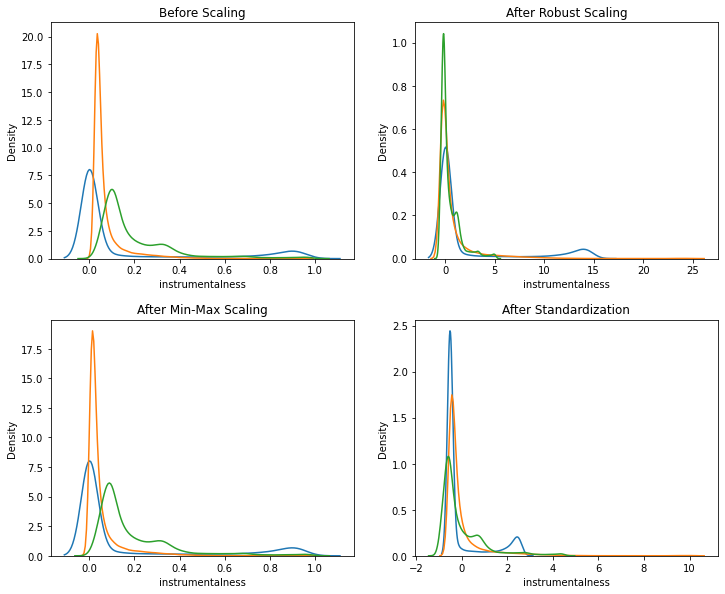

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(10, 8))
fig.tight_layout(h_pad=4, w_pad=3)

ax1.set_title('Before Scaling')
sns.kdeplot(data['instrumentalness'], ax=ax1)
sns.kdeplot(data['speechiness'], ax=ax1)
sns.kdeplot(data['liveness'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_data['instrumentalness'], ax=ax2)
sns.kdeplot(robust_scaled_data['speechiness'], ax=ax2)
sns.kdeplot(robust_scaled_data['liveness'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_data['instrumentalness'], ax=ax3)
sns.kdeplot(minmax_scaled_data['speechiness'], ax=ax3)
sns.kdeplot(minmax_scaled_data['liveness'], ax=ax3)

ax4.set_title('After Standardization')
sns.kdeplot(standardized_data['instrumentalness'], ax=ax4)
sns.kdeplot(standardized_data['speechiness'], ax=ax4)
sns.kdeplot(standardized_data['liveness'], ax=ax4)

plt.show()

In:
* Orange: distribution of `instrumentalness`;
* Blue: distribution of `speechiness`;
* Green: distribution of `liveness`.

## Transformation of variables

### Change of scale `duration_ms`
We transform the unit measure of `duration_ms` from milliseconds to seconds for a better interpretation. The new variable will be called `duration_s`.

In [28]:
data["duration_s"] = round(data["duration_ms"]/1000.0,2)
data.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'decade', 'hit',
       'duration_s'], dtype=object)

### Change of scale `chorus_hit`
`chorus_hit` is also in milliseconds, so we will transform this variable into seconds.



In [29]:
data["chorus_hit"] = round(data["chorus_hit"]/1000.0,2)

In [30]:
data["chorus_hit"].describe()

count    40683.000000
mean         0.040132
std          0.019252
min          0.000000
25%          0.030000
50%          0.040000
75%          0.050000
max          0.430000
Name: chorus_hit, dtype: float64

In [31]:
data["chorus_hit"].isna().describe()

count     40683
unique        1
top       False
freq      40683
Name: chorus_hit, dtype: object

### Change the order of the remaining variables
We change the order of the columns and drop `duration_ms`.

In [32]:
data=data[['track', 'artist', 'uri', 'danceability', 'energy', 'key','loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','duration_s','time_signature', 'chorus_hit', 'sections', 'decade', 'hit']]
data=data.drop(['duration_ms'],axis=1)
data.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s',
       'time_signature', 'chorus_hit', 'sections', 'decade', 'hit'],
      dtype=object)

## Outlier Detection

One of the most important steps as part of data preprocessing is the detection and explanation of outlier values. 
Some possible tratments will be evaluated.

### Boxplot for outliers visualization

We used box plots to visualize the distribution of quantitative data and skewness through displaying the data quartiles (or percentiles) and means.

As can be seen from the graphs below, several variables have asymmetrical distribution and outliers.
In particular, most of the variables have positive skewness (such as `speechiness`, `instrumentalness`, `liveness` etc.).

The variable `loudness`, whose values are negative, is instead characterized by a negative skewness.

Text(0, 0.5, 'Valence')

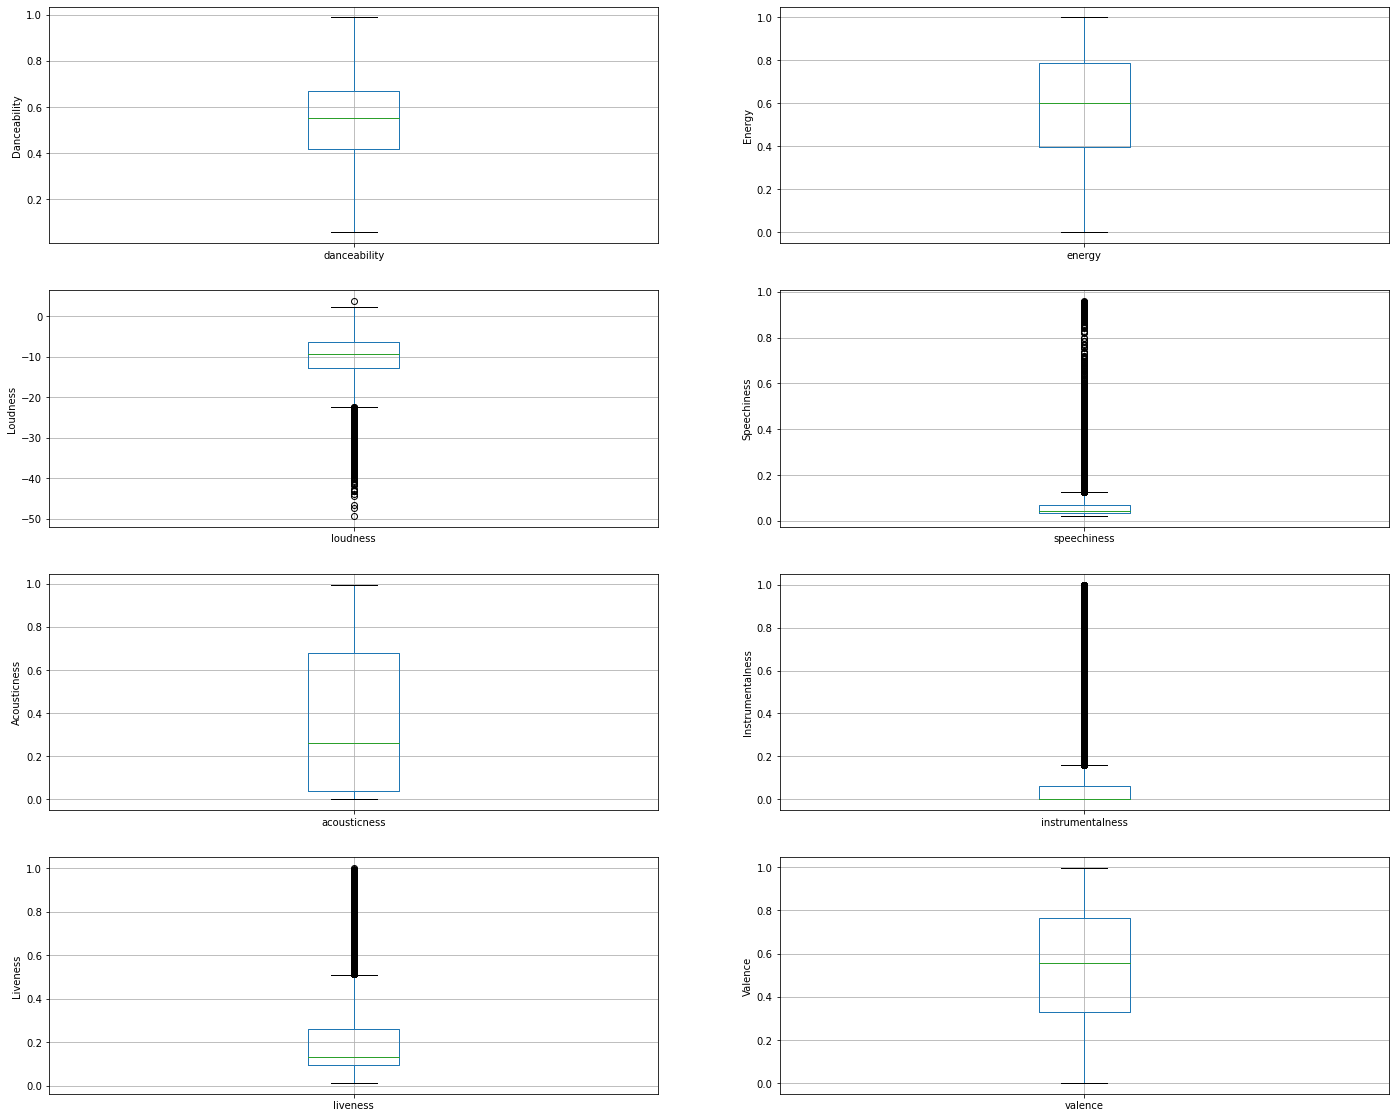

In [33]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = data.boxplot(column='danceability')
fig.set_title('')
fig.set_ylabel('Danceability')


plt.subplot(4, 2, 2)
fig = data.boxplot(column='energy')
fig.set_title('')
fig.set_ylabel('Energy')


plt.subplot(4, 2, 3)
fig = data.boxplot(column='loudness')
fig.set_title('')
fig.set_ylabel('Loudness')


plt.subplot(4, 2, 4)
fig = data.boxplot(column='speechiness')
fig.set_title('')
fig.set_ylabel('Speechiness')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='acousticness')
fig.set_title('')
fig.set_ylabel('Acousticness')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='instrumentalness')
fig.set_title('')
fig.set_ylabel('Instrumentalness')


plt.subplot(4, 2, 7)
fig = data.boxplot(column='liveness')
fig.set_title('')
fig.set_ylabel('Liveness')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='valence')
fig.set_title('')
fig.set_ylabel('Valence')

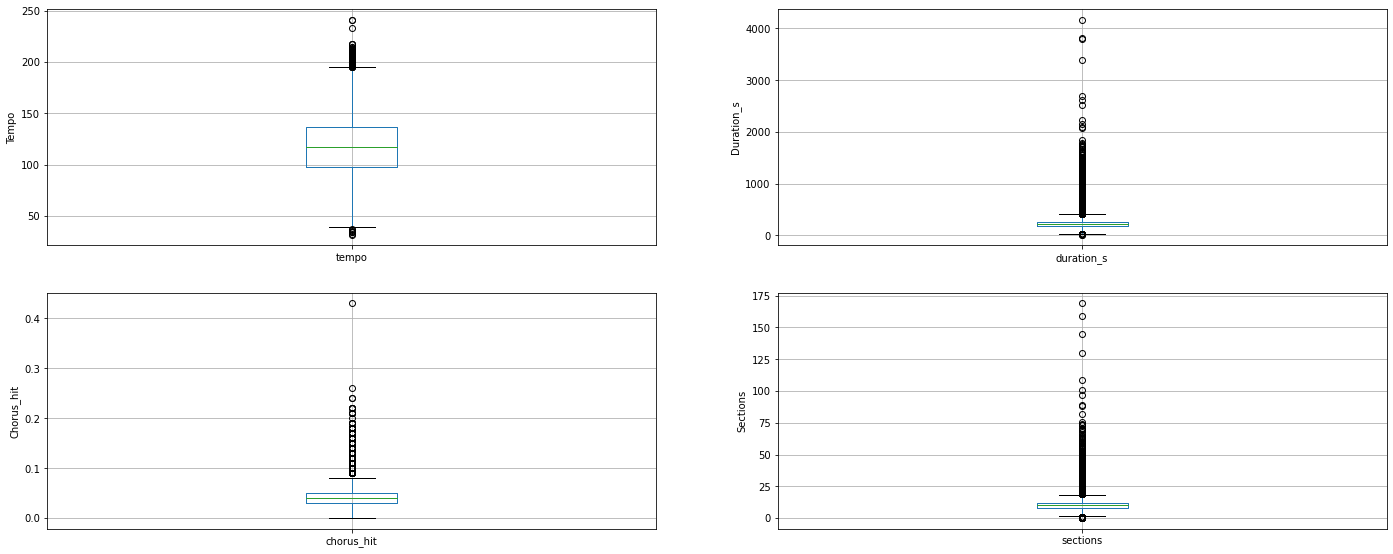

In [34]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = data.boxplot(column='tempo')
fig.set_title('')
fig.set_ylabel('Tempo')

plt.subplot(4, 2, 2)
fig = data.boxplot(column='duration_s')
fig.set_title('')
fig.set_ylabel('Duration_s')

plt.subplot(4, 2, 3)
fig = data.boxplot(column='chorus_hit')
fig.set_title('')
fig.set_ylabel('Chorus_hit')

plt.subplot(4, 2, 4)
fig = data.boxplot(column='sections')
fig.set_title('')
fig.set_ylabel('Sections')

plt.show()

We compute the number of outliers on a univariate level. The algorithm used is based on an interquartile difference.

In [35]:
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-3*iqr
    high = q3+3*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name].shape)

danceability
Outliers =  (0,)
energy
Outliers =  (0,)
key
Outliers =  (0,)
loudness
Outliers =  (177,)
mode
Outliers =  (0,)
speechiness
Outliers =  (3168,)
acousticness
Outliers =  (0,)
instrumentalness
Outliers =  (8099,)
liveness
Outliers =  (902,)
valence
Outliers =  (0,)
tempo
Outliers =  (0,)
duration_s
Outliers =  (668,)
time_signature
Outliers =  (4782,)
chorus_hit
Outliers =  (279,)
sections
Outliers =  (576,)


As can be seen in the previous output many values differ significantly from other observations. Looking at the distribution of the variable `instrumentalness` alone, about 20% of the observations should be identified as outliers. This proportion of outlier data cannot be treated with imputation or deletion since we'll change too much the nature of our

However, in the next section, we will give a possible reason as to explain why so many units may result in being outliers.

### Effects of transformations on distributions and outliers

We saw the effects of some transformations on those variables that have many outliers, such as instrumentalness and speechiness. Our idea was to see if these transformations made it possible to mitigate the problem of outliers.

#### **`instrumentalness`**

As seen above, the instrumentalness distribution is strongly characterized by positive skewness. 78% of the songs in our dataset has a value of `instrumentalness` less than 0.15.

Text(0.5, 0, 'instrumentalness')

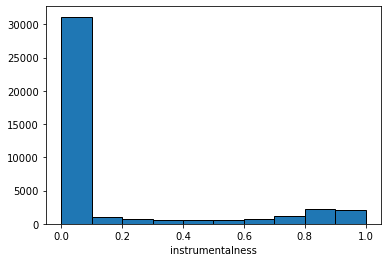

In [36]:
plt.hist(data["instrumentalness"],edgecolor="black", bins = 10)
plt.xlabel("instrumentalness")

In [37]:
print(data.loc[data['instrumentalness'] < 0.15].shape)
print(data.shape)
print("Percentage of songs with instrumentalness less than 0.15:",round((32142/41105)*100,2),'%')
print(data.loc[data['instrumentalness'] > 0.5].shape)
print("Percentage of songs with instrumentalness greater than 0.5:",round((6647/41105)*100,2),'%')

(31735, 20)
(40683, 20)
Percentage of songs with instrumentalness less than 0.15: 78.19 %
(6639, 20)
Percentage of songs with instrumentalness greater than 0.5: 16.17 %


We tried to use different types of transformations with the aim of decreasing the positive asymmetry and consequently decreasing the weight of the outliers.

The transformations tested are:
* Box Cox transformation
* Square Root transformation
* Cube Root transformation

In [38]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy import stats
pt = PowerTransformer(method='yeo-johnson')
pt.fit(data[['instrumentalness']])
print(pt.lambdas_)

[-7.56442987]


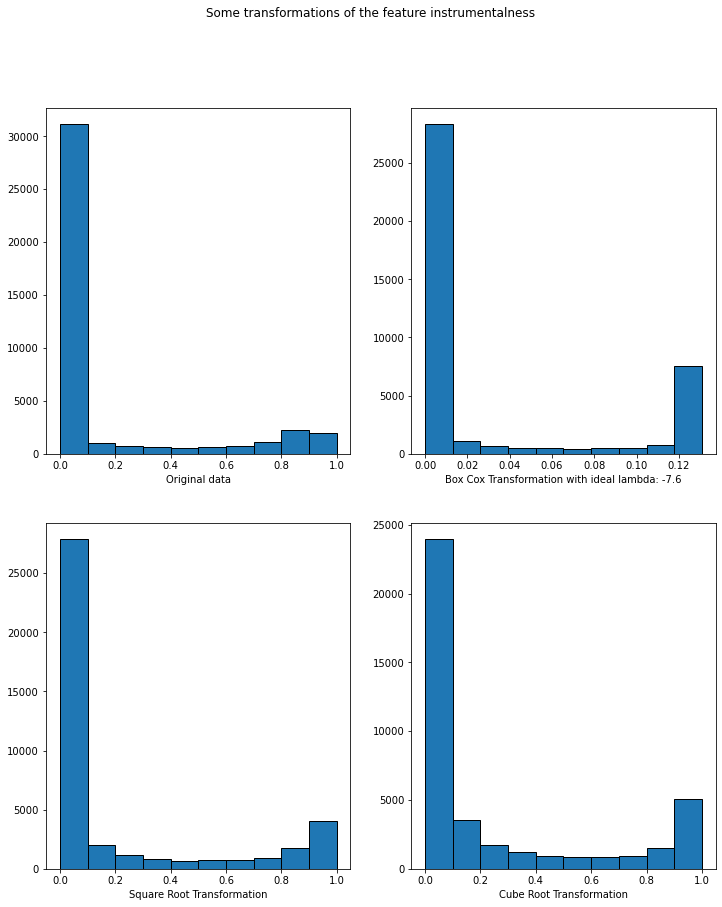

In [39]:
plt.figure(2,figsize=(12,14))
plt.subplot(2,2,1)
plt.hist(data["instrumentalness"],edgecolor="black", bins = 10)
plt.xlabel("Original data")

plt.subplot(2,2,2)
plt.hist(boxcox1p(data["instrumentalness"], -7.6),edgecolor="black", bins = 10)
plt.xlabel("Box Cox Transformation with ideal lambda: -7.6")

plt.subplot(2,2,3)
plt.hist(np.sqrt(data['instrumentalness']),edgecolor="black", bins = 10)
plt.xlabel("Square Root Transformation")

plt.subplot(2,2,4)
plt.hist(np.cbrt(data["instrumentalness"]),edgecolor="black", bins = 10)
plt.xlabel("Cube Root Transformation")
plt.suptitle('Some transformations of the feature instrumentalness')

plt.show()

Not only the transformations didn't help our cause, but they also create more problems, in the sense that now our data is different because of the transformation.

#### **`speechiness`**

We repeated the same kind of transformations for other variables, including speechiness.

In [40]:
optimal_speechiness=pt.fit(data[['speechiness']])
print(pt.lambdas_)

[-20.00019704]


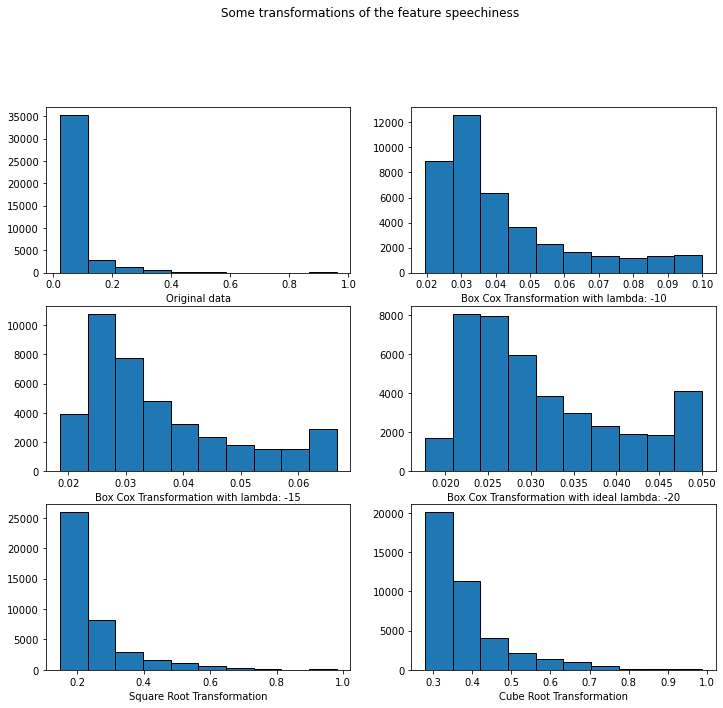

In [41]:
plt.figure(2,figsize=(12,14))
plt.subplot(4,2,1)
plt.hist(data["speechiness"],edgecolor="black", bins = 10)
plt.xlabel("Original data")

plt.subplot(4,2,2)
plt.hist(boxcox1p(data["speechiness"], -10),edgecolor="black", bins = 10)
plt.xlabel("Box Cox Transformation with lambda: -10")

plt.subplot(4,2,3)
plt.hist(boxcox1p(data["speechiness"], -15),edgecolor="black", bins = 10)
plt.xlabel("Box Cox Transformation with lambda: -15")

plt.subplot(4,2,4)
plt.hist(boxcox1p(data["speechiness"], -20),edgecolor="black", bins = 10)
plt.xlabel("Box Cox Transformation with ideal lambda: -20")

plt.subplot(4,2,5)
plt.hist(np.sqrt(data['speechiness']),edgecolor="black", bins = 10)
plt.xlabel("Square Root Transformation")

plt.subplot(4,2,6)
plt.hist(np.cbrt(data["speechiness"]),edgecolor="black", bins = 10)
plt.xlabel("Cube Root Transformation")
plt.suptitle('Some transformations of the feature speechiness')

plt.show()

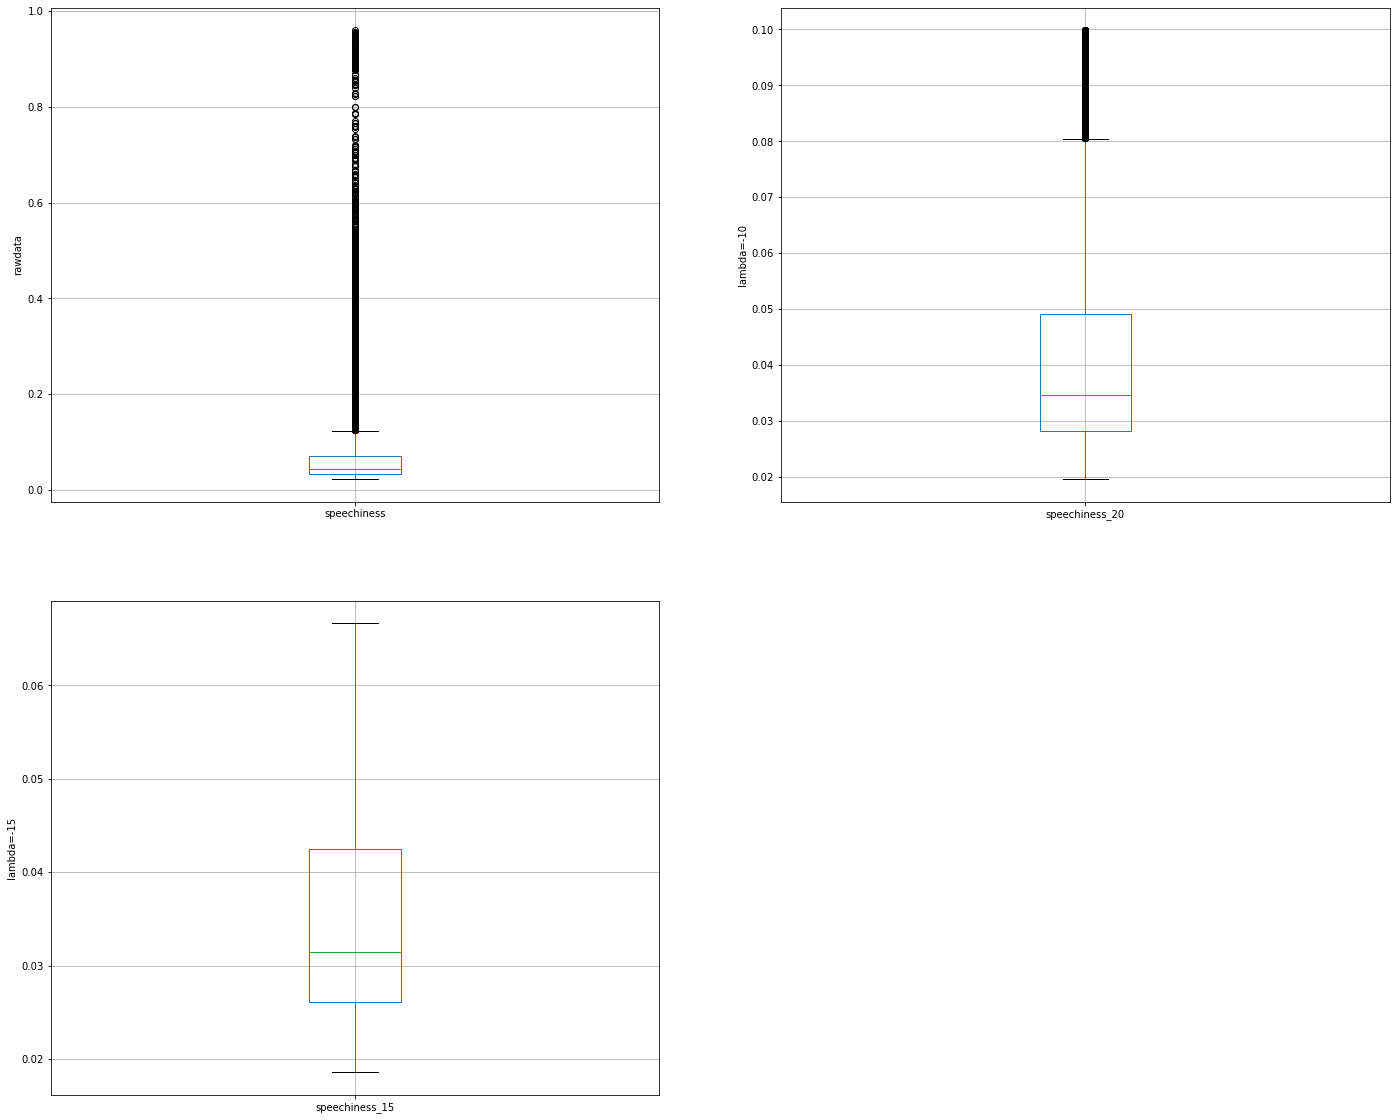

In [42]:
data["speechiness_15"]=boxcox1p(data["speechiness"], -15)
data["speechiness_20"]=boxcox1p(data["speechiness"], -10)
plt.figure(figsize=(24,20))
plt.subplot(2, 2, 1)
fig = data.boxplot(column='speechiness')
fig.set_title('')
fig.set_ylabel('rawdata')

plt.subplot(2, 2, 3)
fig = data.boxplot(column='speechiness_15')
fig.set_title('')
fig.set_ylabel('lambda=-15')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='speechiness_20')
fig.set_title('')
fig.set_ylabel('lambda=-10')

plt.show()
data=data.drop(['speechiness_20','speechiness_15'],axis=1)

Although we have found that the Box Cox transformation with `lambda = -15` improves the problem of outliers, we believe that it is more important to maintain the nature and scale of the original data because these transformations don't solve the problem for each variable.

### Conclusions

Most of the outliers were detected because of the distribution of some variables, that are very concentred around some values.
We have decided, after some trial and error, that we will not apply any transformation to the data, but we rather use various Scalers in the most sensitive models. 
This will ensure us a better interpretation of the data and of the computed models and a well-tailored solution to fit the needs of every model.

## Dataframe `data_multiclass`
In the following section, a new dataframe will be defined, `data_multiclass`. This dataframe will contain a new variable, `DISCRETE_VALENCE`, that will be created as instructed. This new dataframe will be used in all the multiclass classification tasks.


We create three classes and eliminate the variable `valence`.

In [43]:
data_multiclass=data.copy(deep=True)
data_multiclass["DISCRETE_VALENCE"] = pd.cut(data_multiclass.valence,[0, 0.33,0.66, 1], labels=["Negative", "Neutral","Positive"], include_lowest=False, right=True)
data_multiclass['DISCRETE_VALENCE'][data_multiclass.valence == 0] = "Negative"
data_multiclass = data_multiclass.drop(['valence'],axis=1)

We check if the new variable is created correctly.
We can see that there are no missing values and there is no evident class imbalance between Negative, Neutral and Positive.

In [44]:
print("Python, are there any missing values?",data_multiclass.isnull().values.any())
data_multiclass['DISCRETE_VALENCE'].value_counts(normalize=True)

Python, are there any missing values? False


Positive    0.378094
Neutral     0.369909
Negative    0.251997
Name: DISCRETE_VALENCE, dtype: float64

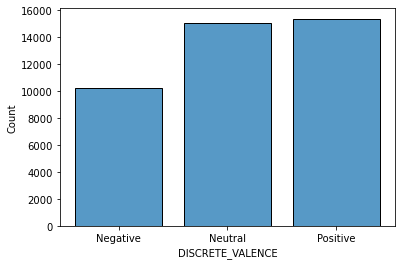

In [45]:
sns.histplot(data=data_multiclass, x="DISCRETE_VALENCE",stat='count',discrete=True,shrink=.8)
plt.show()

### Exploring some distributions

We explored the distributions of some variables against the three created categories of `DISCRETE_VALENCE`.

From the graph below we can see that for high `instrumentalness` values there is a higher density of tracks with a `Negative Valence`, while for low levels of instrumentalness there is a higher density of tracks with  `Neutral` and `Positive Valence`.

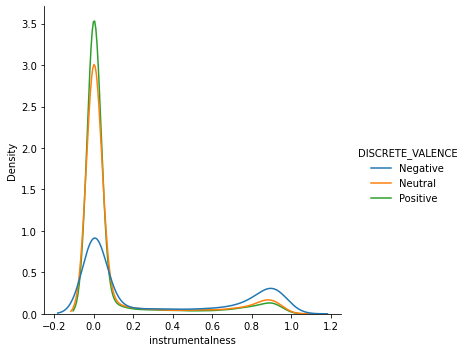

In [46]:
sns.displot(data_multiclass, x="instrumentalness", hue="DISCRETE_VALENCE", kind="kde")

The graph of `danceability` shows that for high values of `danceability` there is a greater concentration of high values also for `valence`. This will also be underlined by the correlation matrix by finding a correlation between `valence` and `danceability` equal to 0.55.

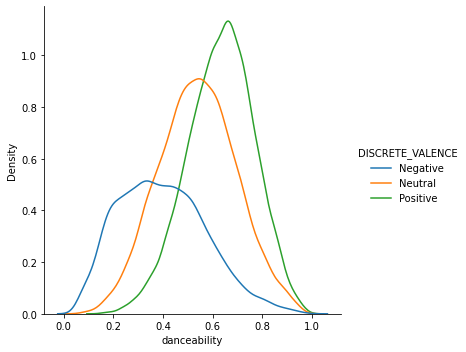

In [47]:
sns.displot(data_multiclass, x="danceability", hue="DISCRETE_VALENCE", kind="kde")

Regarding the categorical variable `key`, there are no major differences in the `valence` values between the various categories of `key`. For this reason we will decide to treat this variable differently in the association rules section.

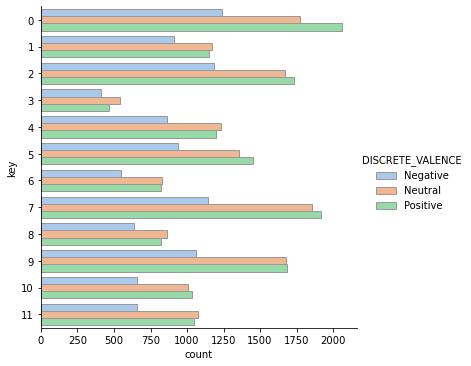

In [48]:
sns.catplot(y="key", hue="DISCRETE_VALENCE", kind="count",
            palette="pastel", edgecolor=".6",
            data=data_multiclass)

Next, we moved on to see the bar graphs of `DISCRETE_VALENCE` based on the values of `decade`.

The decades in which the relative percentage of `DISCRETE_VALENCE = Positive` is greater than the others are: 60s, 70s, 80s.

On the contrary, for 90s, 00s and 10s the relative percentage of `DISCRETE_VALENCE = Positive` decreases and that of `DISCRETE_VALENCE = Neutral` increases.

From the exploratory analysis we can conclude that in the sample of songs collected, those belonging to the 60-80s have a greater prevalence of more positive sound (e.g. happy, cheerful, euphoric), while for the 90-2010s a more neutral sound.

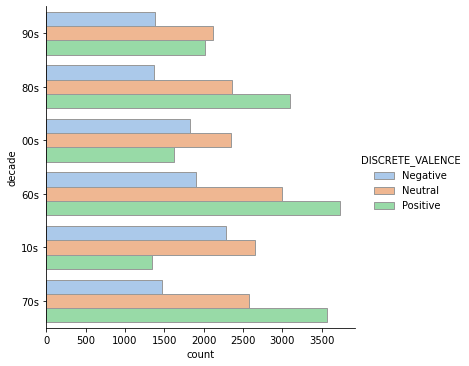

In [49]:
sns.catplot(y="decade", hue="DISCRETE_VALENCE", kind="count",
            palette="pastel", edgecolor=".6",
            data=data_multiclass)

## Encoding qualitative variables
In this section we will discuss the decisions regarding the econding of the qualitative variables, for example `decade`, `DISCRETE_VALENCE` and `key`.



The decision regarding the econding depends on the type of algorithm we want to use.

In decision tree we prefer to use label/ordinal encoding for nominal and ordinal variable. 
In the case of Linear, kNN or Neural Network based models we'll use One-hot-Encoding.

The following codes cointain two functions useful to encode the qualitative variables:


1.   One-Hot-Encoding
2.   Label Encoding




### One-hot-encoding (OHE)
A one hot encoding is a representation of categorical variables as binary vectors. For each category will be created a dummy variable. The binary vector has all zero values except values equal to 1 when that particular observation belongs to the category represented by the dummy.

We start by defining the function `ohe_encode_feature` that given a target column (`col`), the number of rows (`nrow`) and the number of possible values (`ndim`), replaces the original column by `ndim` new binary colums.



In [50]:
from sklearn.preprocessing import OneHotEncoder

def ohe_encode_feature(table_X, col, nrow, ndim):
    enc = LabelEncoder()
    label_encoder = enc.fit(table_X[:, col])
    integer_classes = label_encoder.transform(label_encoder.classes_).reshape(ndim, 1)
    enc = OneHotEncoder()
    one_hot_encoder = enc.fit(integer_classes)
    # First, convert feature values to 0-(N-1) integers using label_encoder
    num_of_rows = nrow
    t = label_encoder.transform(table_X[:, col]).reshape(num_of_rows, 1)
    # Second, create a sparse matrix with col columns, each one indicating
    # whether the instance belongs to the class
    new_features = one_hot_encoder.transform(t)
    # Add the new features to table_X
    table_X = np.concatenate([table_X, new_features.toarray()], axis = 1)
    # Eliminate converted columns
    table_X = np.delete(table_X, [col], 1)
    return table_X

### Label encoding
In this technique, each label is assigned a unique integer based on alphabetical ordering.

Since the variables `decade` and `DISCRETE_VALENCE` are ordinal variables, with this type of encoding we would lose the order that exists between the various categories. For this reason we will use an Ordinal Encoder for these variables.

In any case, we will need the following functions to be able to use OHE.

For using LabelEncoding, we still need the functions `int_encode_feature` and `int_encode_class`.

In [51]:
from sklearn.preprocessing import LabelEncoder

def int_encode_class(vect):
    enc = LabelEncoder()
    label_encoder = enc.fit(vect)
    integer_classes = label_encoder.transform(label_encoder.classes_)
    t = label_encoder.transform(vect)
    return t
    
def int_encode_feature(vect):
    return int_encode_class(vect)

## Correlation matrix

We'll looked only at the correlations between quantitative variables since these are Pearson correlations. So, we'll exclude from our analysis the qualitative variables: `key`,`mode`, `hit`, `decade`.

<AxesSubplot:>

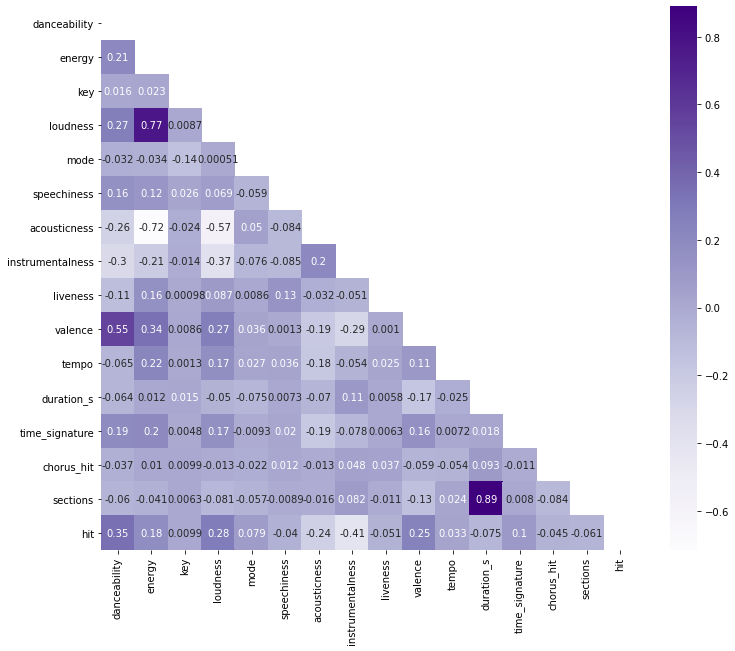

In [52]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap="Purples")

High correlations found:
* `duration_s` and `sections` = 0.889
* `energy` and `loudness` = 0.77
* `energy` and `acousticness` = -0.72

Other correlations found:
* `valence` and `danceability`: 0.55
* `acousticness` and `loudness`: -0.57
* `valence` and `energy`: 0.34
* `valence` and `loudness`: 0.27
* `valence` and `instrumentalness`: -0.29

We will see how some of these associations will recur in our models.

# Task 2 (Unsupervised Learning) - Characterizing Tracks

We decide to start with task 2 because it is much more connected and a continuous of the exploratory data analysis in task 0.

In this task we **use unsupervised learning algorithms and try to characterize the tracks**. We use:
* **Association rule mining** to find **associations between the features and the target hit/discrete valence**.
* **Clustering algorithms to find similar groups of tracks**. Is it possible to find groups of tracks which are composed of hit songs with similar valences? Are tracks possibly grouped by decade?

## 2.1. Association rules

### 2.1.1 Introduction to Association Rules

The whole process that brings to the implementation of Association Rules is full of fine tuning and analyst decisions. To avoid getting lost in the thousands of possible rules, we decided to fix some specific questions to answer.
We have been hired by a very broke musician that is trying its hardest to become famous and he is absolutely sure that there is some sort of secret recipe to the songs that every GOAT of music followed. He says that the recipe is top secret, but he knows that there is a maximum of 10 ingredients.
Determined to help him, we will perform a Association Rules analysis to find the 10 features that will guarantee the best insight into the world hits.

Going specifically, the goal of an association rules algorithm is to discover important associations among items such that the presence of some items in a transaction/observation will imply the presence of some other items.

To achieve this goal it is necessary that each column of our dataset is a dummy variable that has a value of 1 when that specific song has that characteristic.

In the case of continuous variables this is possible only through a discretization process and, as we will see, we will use rather simple partitions in order to have an effective interpretation of the rules and items created.

### 2.1.2 AR with hit
The first goal is to find the ingredients of the perfect hit song.

#### Preprocessing Data for Association Rule Mining (hit)

In [53]:
data1=data.copy(deep=True)
del data1["track"]
del data1["artist"]
del data1["uri"]

After an analysis of descriptive data, we decided to delete the variable key.
The decision was driven by the fact that we analyzed the distribution of key, split by hit or flip and we realize that there was no impactful difference. 
So, to simplify the analysis, we decided not to include this variable in AR.

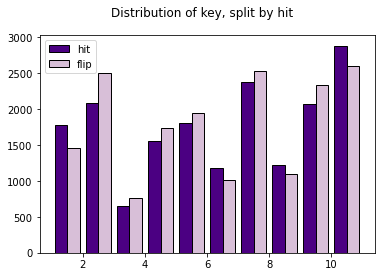

In [54]:
scale=data["key"]
nominal=data["hit"]
hit= nominal==1
flip= nominal==0
keybyhit=scale[hit]
keybyflip=scale[flip]
plt.hist((keybyhit, keybyflip), color=("indigo","thistle"),edgecolor="black", bins=[1,2,3,4,5,6,7,8,9,10,11], label = ("hit", "flip"))
plt.legend()
xlim=(1,11)
plt.suptitle("Distribution of key, split by hit")
plt.show()

In [55]:
del data1["key"]

Danceability, Energy, Acousticness and Instrumentalness were split with a threshold of `0.5`. 
This is going to help us with the interpretation of rules. Now we have new dummy variables:
*   `more_danceable`, which is equal to `1` when the values of `danceability` are greater than `0.5`.
*   `energetic`, which is equal to `1` when the values of `energy` are greater than `0.5`.
* `acoustic`, which is equal to `1` when the values of `acousticness` are greater than `0.5`.
* `instrumental`, which is equal to `1` when the values of `instrumentalness` are greater than `0.5`.

This is going to give more approximate, but also more immediate information about the songs.






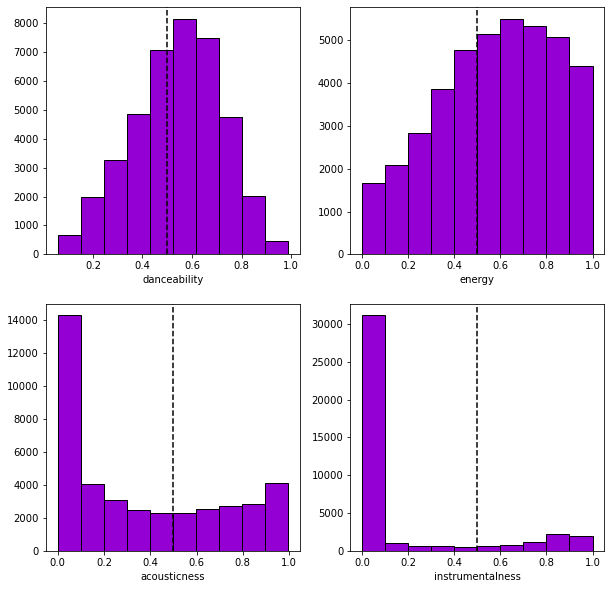

In [56]:
plt.figure(2,figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(data["danceability"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(0.5, color='black', linestyle='--')
plt.xlabel("danceability")

plt.subplot(2,2,2)
plt.hist(data["energy"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(0.5, color='black', linestyle='--')
plt.xlabel("energy")

plt.subplot(2,2,3)
plt.hist(data["acousticness"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(0.5, color='black', linestyle='--')
plt.xlabel("acousticness")

plt.subplot(2,2,4)
plt.hist(data["instrumentalness"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(0.5, color='black', linestyle='--')
plt.xlabel("instrumentalness")
plt.show()

In [57]:
binarizer = preprocessing.Binarizer(threshold=0.5)
data1["more_danceable"] = binarizer.transform(data1[["danceability"]])
data1["energetic"] = binarizer.transform(data1[["energy"]])
data1["acoustic"] = binarizer.transform(data1[["acousticness"]])
data1["instrumental"] = binarizer.transform(data1[["instrumentalness"]])

`valence` was binned as instructed in the description of data.

In [58]:
data1['DISCRETE_VALENCE'] = 'Negative'
data1.loc[(data1['valence'] >= 0) & (data1['valence'] <= 0.33), 'DISCRETE_VALENCE'] = 'Negative'
data1.loc[(data1['valence'] > 0.33) & (data1['valence'] <= 0.66), 'DISCRETE_VALENCE'] = 'Neutral'
data1.loc[(data1['valence'] > 0.66) & (data1['valence'] <= 1), 'DISCRETE_VALENCE'] = 'Positive'

The following variables presented a different type of distribution, so we decided to bin them by their `median` value, in order to have more regularly populated bins.

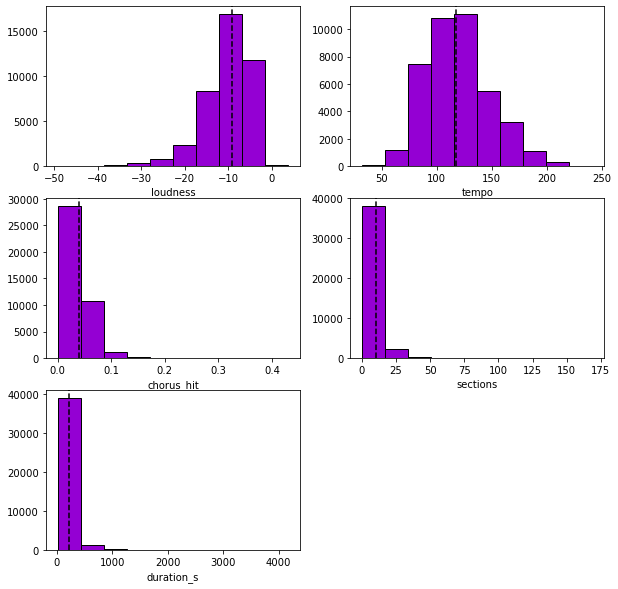

In [59]:
plt.figure(1,figsize=(10,10))

plt.subplot(3,2,1)
plt.hist(data["loudness"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(statistics.median(data["loudness"]), color='black', linestyle='--')
plt.xlabel("loudness")

plt.subplot(3,2,2)
plt.hist(data["tempo"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(statistics.median(data["tempo"]), color='black', linestyle='--')
plt.xlabel("tempo")

plt.subplot(3,2,3)
plt.hist(data["chorus_hit"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(statistics.median(data["chorus_hit"]), color='black', linestyle='--')
plt.xlabel("chorus_hit")

plt.subplot(3,2,4)
plt.hist(data["sections"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(statistics.median(data["sections"]), color='black', linestyle='--')
plt.xlabel("sections")

plt.subplot(3,2,5)
plt.hist(data["duration_s"],edgecolor="black", bins = 10, color="darkviolet")
plt.axvline(statistics.median(data["duration_s"]), color='black', linestyle='--')
plt.xlabel("duration_s")

plt.show()

In [60]:
binarizer = preprocessing.Binarizer(threshold=(statistics.median(data["loudness"])))
data1["louder"] = binarizer.transform(data[["loudness"]])
binarizer = preprocessing.Binarizer(threshold=(statistics.median(data["tempo"])))
data1["higher_tempo"] = binarizer.transform(data[["tempo"]])
binarizer = preprocessing.Binarizer(threshold=(statistics.median(data["chorus_hit"])))
data1["later_chorus_hit"] = binarizer.transform(data[["chorus_hit"]])
binarizer = preprocessing.Binarizer(threshold=(statistics.median(data["sections"])))
data1["higher_number_of_sections"] = binarizer.transform(data[["sections"]])
binarizer = preprocessing.Binarizer(threshold=(statistics.median(data["duration_s"])))
data1["longer_songs"]=binarizer.transform(data[["duration_s"]])

`liveness` was binned with a threshold of `0.8`. This choice was made because of the data description: "A value above 0.8 provides strong likelihood that the track is live".

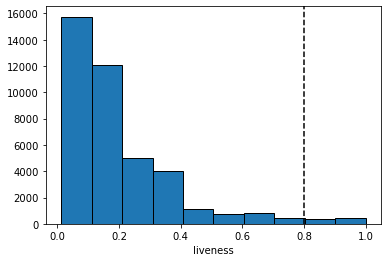

In [61]:
plt.hist(data["liveness"],edgecolor="black", bins = 10)
plt.axvline(0.8, color='black', linestyle='--')
plt.xlabel("liveness")
plt.show()

In [62]:
binarizer = preprocessing.Binarizer(threshold=0.8)
data1["lively"] = binarizer.transform(data1[["liveness"]])

`time_signature` was binned with a threshold of 4 because of its distribution.

Text(0.5, 0.98, 'Distribution of time_signature')

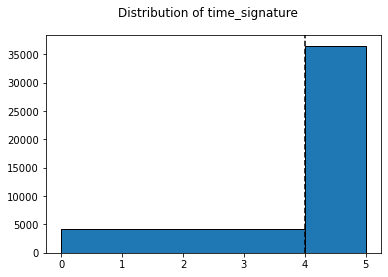

In [63]:
plt.hist(data["time_signature"],edgecolor="black", bins =[0,4,5])
plt.axvline(4, color='black', linestyle='--')
plt.suptitle("Distribution of time_signature")

In [64]:
binarizer = preprocessing.Binarizer(threshold=4)
data1["more_beats"] = binarizer.transform(data1[["time_signature"]])

`speechiness` was binned according to the data description.

In [65]:
data1["speechiness_discr"] = "non-speech-like"
data1.loc[(data1["speechiness"] >= 0) & (data1["speechiness"] <= 0.33), 'speechiness_discr'] = 'non-speech-like'
data1.loc[(data1["speechiness"] > 0.33) & (data1["speechiness"] <= 0.66), 'speechiness_discr'] = 'words-and-music'
data1.loc[(data1["speechiness"] > 0.66) & (data1["speechiness"] <= 1), 'speechiness_discr'] = 'spoken words'

We delete all the continuos variables.

In [66]:
del data1["danceability"]
del data1["energy"]
del data1["acousticness"]
del data1["instrumentalness"]
del data1['valence']
del data1["loudness"]
del data1["tempo"]
del data1["chorus_hit"]
del data1["sections"]
del data1["duration_s"]
del data1["liveness"]
del data1["time_signature"]
del data1["speechiness"]

We make dummies out of all the variables of the dataset `data1`.

In [67]:
dummied_data=pd.get_dummies(data1)
binary_music = (dummied_data > 0).astype(int)
binary_music

,mode,hit,more_danceable,energetic,acoustic,instrumental,louder,higher_tempo,later_chorus_hit,higher_number_of_sections,...,decade_60s,decade_70s,decade_80s,decade_90s,DISCRETE_VALENCE_Negative,DISCRETE_VALENCE_Neutral,DISCRETE_VALENCE_Positive,speechiness_discr_non-speech-like,speechiness_discr_spoken words,speechiness_discr_words-and-music
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,1,1,1,1,1,0,1,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,1,1,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
41102,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
41103,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
41104,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Finding Associations (hit)

We generate the rules with a minimum support of 10%. Remember, we are here to find the crème de la crème of music.

In [68]:
frequent_itemsets = apriori(binary_music, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by=['support'],ascending=False)

,support,itemsets,length
20,0.976600,(speechiness_discr_non-speech-like),1
0,0.692869,(mode),1
37,0.678514,"(speechiness_discr_non-speech-like, mode)",2
3,0.625839,(energetic),1
75,0.611066,"(energetic, speechiness_discr_non-speech-like)",2
...,...,...,...
444,0.100386,"(higher_number_of_sections, energetic, more_da...",4
235,0.100263,"(DISCRETE_VALENCE_Neutral, more_danceable, hig...",3
281,0.100165,"(higher_number_of_sections, longer_songs, acou...",3
539,0.100165,"(higher_number_of_sections, mode, energetic, s...",5


**Exploring the frequent itemsets**

We explore the rules with a minimum length of 2 items.

In [69]:
frequent_itemsets_2=frequent_itemsets[frequent_itemsets['length'] >= 2]
frequent_itemsets_2sorted= frequent_itemsets_2.sort_values(by=['support'], ascending=False)
frequent_itemsets_2sorted.head(10)

,support,itemsets,length
37,0.678514,"(speechiness_discr_non-speech-like, mode)",2
75,0.611066,"(energetic, speechiness_discr_non-speech-like)",2
63,0.587371,"(speechiness_discr_non-speech-like, more_dance...",2
101,0.489000,"(speechiness_discr_non-speech-like, higher_tempo)",2
115,0.488140,"(speechiness_discr_non-speech-like, longer_songs)",2
94,0.487624,"(speechiness_discr_non-speech-like, louder)",2
49,0.483519,"(speechiness_discr_non-speech-like, hit)",2
64,0.447804,"(energetic, louder)",2
258,0.436792,"(energetic, speechiness_discr_non-speech-like,...",3
50,0.427132,"(energetic, more_danceable)",2


These are the 10 itemsets with the most support. Most of them are itemsets with `length=2`. 

The only one where we encounter hit is `"non-speech-like,hit"`.

#### Association Rules - Results and Discussion (hit)

After a process of trial and error, we fixed our threshold. The lift of the rules must be at least one and the confidence of the rules must be at least 70%. This ensures us few rules, but of higher quality. This is consistent with the question we are trying to answer to. 

In [70]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
ruleshit=rules[rules['consequents'] == {'hit'}]
ruleshit=ruleshit.sort_values(by="lift", ascending=False)
ruleshit

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
587,"(energetic, more_danceable, louder, mode)",(hit),0.201091,0.494801,0.143893,0.715560,1.446157,0.044393,1.776120
902,"(more_danceable, mode, energetic, speechiness_...",(hit),0.196298,0.494801,0.140304,0.714751,1.444521,0.043176,1.771079
362,"(longer_songs, more_danceable, louder)",(hit),0.181304,0.494801,0.128776,0.710277,1.435478,0.039067,1.743728
233,"(more_danceable, louder, mode)",(hit),0.223681,0.494801,0.158567,0.708901,1.432699,0.047890,1.735488
776,"(speechiness_discr_non-speech-like, longer_son...",(hit),0.175257,0.494801,0.124180,0.708555,1.432000,0.037462,1.733430
733,"(energetic, longer_songs, more_danceable, louder)",(hit),0.166999,0.494801,0.118280,0.708272,1.431427,0.035649,1.731746
604,"(speechiness_discr_non-speech-like, more_dance...",(hit),0.218126,0.494801,0.154413,0.707911,1.430697,0.046485,1.729604
915,"(longer_songs, more_danceable, mode, energetic...",(hit),0.145417,0.494801,0.102844,0.707235,1.429331,0.030891,1.725610
593,"(energetic, longer_songs, more_danceable, mode)",(hit),0.149079,0.494801,0.105400,0.707007,1.428871,0.031636,1.724271
957,"(longer_songs, more_danceable, energetic, spee...",(hit),0.161370,0.494801,0.114028,0.706626,1.428101,0.034182,1.722030


In [71]:
ruleshit.to_excel('ruleshit.xlsx')

The first thing that pops is that `more_danceable` songs are part of all 10 rules. So we have found ourselves our first sure ingredient.

Another feature is `louder` songs that appears with `more_danceable` in the first 7 rules.

In the first 2 rules we have songs that are `more_danceable`, `louder`, `energetic` and in a major `mode`. The second rule also adds `non-speech-like` to the recipe.

Based on the first 7 rules, we can see that different combination of `louder` and `more_danceable` with major `mode`, `longer_songs`, `non-speech-like` and `energetic` are all associated with the song `hit`. Specific combinations can be read in the dataframe above.

The last three rules are combination of `more_danceable` and `longer_songs` with `mode`, `energetic` and `non-speech like`.


These variables are for sure the next best thing to ingredients to historic `hit`, given their association with it.



### 2.1.3 AR with DISCRETE_VALENCE
The second goal is to give this musician further instructions on wheter he wants its music to give summer-like vibes, so a song with Positive Valence, happy, joyful, or target the November gloom with a sad song, with Negative valence.

#### Preprocessing Data for Association Rule Mining (DISCRETE_VALENCE)

We already have a dataset where all the variables are dummies and where valence is categorized by the discrete levels, so there is no need to rerun the preprocessing phase.

In [72]:
binary_music

,mode,hit,more_danceable,energetic,acoustic,instrumental,louder,higher_tempo,later_chorus_hit,higher_number_of_sections,...,decade_60s,decade_70s,decade_80s,decade_90s,DISCRETE_VALENCE_Negative,DISCRETE_VALENCE_Neutral,DISCRETE_VALENCE_Positive,speechiness_discr_non-speech-like,speechiness_discr_spoken words,speechiness_discr_words-and-music
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,1,1,1,1,1,0,1,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,1,1,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
41102,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
41103,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
41104,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Finding Associations (DISCRETE_VALENCE)

In [73]:
frequent_itemsetsval = apriori(binary_music, min_support=0.1, use_colnames=True)
frequent_itemsetsval['length'] = frequent_itemsetsval['itemsets'].apply(lambda x: len(x))
frequent_itemsetsval=frequent_itemsetsval.sort_values(by=['support'],ascending=False)
frequent_itemsetsval

,support,itemsets,length
20,0.976600,(speechiness_discr_non-speech-like),1
0,0.692869,(mode),1
37,0.678514,"(speechiness_discr_non-speech-like, mode)",2
3,0.625839,(energetic),1
75,0.611066,"(energetic, speechiness_discr_non-speech-like)",2
...,...,...,...
444,0.100386,"(higher_number_of_sections, energetic, more_da...",4
235,0.100263,"(DISCRETE_VALENCE_Neutral, more_danceable, hig...",3
281,0.100165,"(higher_number_of_sections, longer_songs, acou...",3
539,0.100165,"(higher_number_of_sections, mode, energetic, s...",5


**Exploring frequent itemsets**

In [74]:
frequent_itemsetsval2=frequent_itemsetsval[frequent_itemsetsval['length'] >= 2]
frequent_itemsetsval2= frequent_itemsetsval2.sort_values(by=['support'], ascending=False)
frequent_itemsetsval2.head(10)

,support,itemsets,length
37,0.678514,"(speechiness_discr_non-speech-like, mode)",2
75,0.611066,"(energetic, speechiness_discr_non-speech-like)",2
63,0.587371,"(speechiness_discr_non-speech-like, more_dance...",2
101,0.489000,"(speechiness_discr_non-speech-like, higher_tempo)",2
115,0.488140,"(speechiness_discr_non-speech-like, longer_songs)",2
94,0.487624,"(speechiness_discr_non-speech-like, louder)",2
49,0.483519,"(speechiness_discr_non-speech-like, hit)",2
64,0.447804,"(energetic, louder)",2
258,0.436792,"(energetic, speechiness_discr_non-speech-like,...",3
50,0.427132,"(energetic, more_danceable)",2


The frequent itemsets are, of course, the same as before.

#### Association Rules - Results and Discussion (DISCRETE_VALENCE)

In this case, we need to be more flexible with the thresholds. 
For this reason, we will only fix the threshold of `lift>=1` and then we will consider the first 10 rules with the highest confidence.

In [75]:
rulesval = association_rules(frequent_itemsetsval, metric="lift", min_threshold=1)
rulesval = association_rules(frequent_itemsetsval, metric="confidence", min_threshold=0.25)
rulesval.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(speechiness_discr_non-speech-like),(mode),0.976600,0.692869,0.678514,0.694772,1.002747,0.001859,1.006235
1,(mode),(speechiness_discr_non-speech-like),0.692869,0.976600,0.678514,0.979282,1.002747,0.001859,1.129472
2,(energetic),(speechiness_discr_non-speech-like),0.625839,0.976600,0.611066,0.976395,0.999791,-0.000128,0.991345
3,(speechiness_discr_non-speech-like),(energetic),0.976600,0.625839,0.611066,0.625708,0.999791,-0.000128,0.999650
4,(speechiness_discr_non-speech-like),(more_danceable),0.976600,0.606470,0.587371,0.601445,0.991715,-0.004907,0.987392


We will now mine two different set of rules:

1.   Rules that have Positive Valence as consequents `rulespos`
2.   Rules that have Negative Valence as consequent `rulesneg`





In [76]:
rulespos = rulesval[rulesval['consequents'] == {'DISCRETE_VALENCE_Positive'}]
rulespos = rulespos.sort_values(by="confidence", ascending=False)
rulespos.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3882,"(more_danceable, mode, energetic, speechiness_...",(DISCRETE_VALENCE_Positive),0.194356,0.378094,0.118133,0.607816,1.607579,0.044648,1.585750
1391,"(energetic, speechiness_discr_non-speech-like,...",(DISCRETE_VALENCE_Positive),0.280019,0.378094,0.169604,0.605688,1.601951,0.063731,1.577193
3648,"(energetic, hit, more_danceable, mode)",(DISCRETE_VALENCE_Positive),0.198584,0.378094,0.119903,0.603788,1.596924,0.044819,1.569628
1315,"(energetic, more_danceable, mode)",(DISCRETE_VALENCE_Positive),0.286410,0.378094,0.172677,0.602901,1.594579,0.064387,1.566122
1448,"(energetic, speechiness_discr_non-speech-like,...",(DISCRETE_VALENCE_Positive),0.281297,0.378094,0.168842,0.600227,1.587508,0.062485,1.555648
3002,"(energetic, speechiness_discr_non-speech-like,...",(DISCRETE_VALENCE_Positive),0.217708,0.378094,0.130349,0.598735,1.583562,0.048035,1.549865
1339,"(energetic, hit, more_danceable)",(DISCRETE_VALENCE_Positive),0.288843,0.378094,0.172087,0.595779,1.575743,0.062877,1.538530
2852,"(energetic, more_danceable, higher_tempo)",(DISCRETE_VALENCE_Positive),0.223140,0.378094,0.132660,0.594514,1.572398,0.048292,1.533731
413,"(energetic, speechiness_discr_non-speech-like,...",(DISCRETE_VALENCE_Positive),0.415702,0.378094,0.246442,0.592833,1.567952,0.089268,1.527400
347,"(energetic, more_danceable)",(DISCRETE_VALENCE_Positive),0.427132,0.378094,0.251727,0.589342,1.558719,0.090231,1.514414


In [77]:
rulespos.to_excel('rulespos.xlsx')

Some features that seem to be associated with Positive Valence are `more_danceable`, `hit`, `energetic`, `non-speech-like`, `mode` and `higher_tempo` in many possible combinations.

Confidence levels range from `0.58` to `0.61`.

Most of these features do not sound surprising, given that we usually associate a danceable song with a persistent beat to be happy and joyful.

In [78]:
rulesneg = rulesval[rulesval['consequents'] == {'DISCRETE_VALENCE_Negative'}]
rulesneg = rulesneg.sort_values(by="confidence", ascending=False)
rulesneg.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3447,"(speechiness_discr_non-speech-like, acoustic)",(DISCRETE_VALENCE_Negative),0.345550,0.251997,0.123713,0.358017,1.420718,0.036635,1.165144
3325,(acoustic),(DISCRETE_VALENCE_Negative),0.354202,0.251997,0.125777,0.355101,1.409145,0.036519,1.159875
4794,"(higher_number_of_sections, speechiness_discr_...",(DISCRETE_VALENCE_Negative),0.341052,0.251997,0.107637,0.315604,1.252409,0.021693,1.092938
4723,"(higher_number_of_sections, longer_songs)",(DISCRETE_VALENCE_Negative),0.349016,0.251997,0.109063,0.312487,1.240041,0.021112,1.087983
5822,"(longer_songs, mode)",(DISCRETE_VALENCE_Negative),0.327213,0.251997,0.100755,0.307918,1.221909,0.018298,1.080800
2147,"(speechiness_discr_non-speech-like, longer_songs)",(DISCRETE_VALENCE_Negative),0.488140,0.251997,0.148219,0.303641,1.204937,0.025209,1.074162
2108,(longer_songs),(DISCRETE_VALENCE_Negative),0.499988,0.251997,0.150259,0.300526,1.192577,0.024264,1.069379
3759,"(higher_number_of_sections, speechiness_discr_...",(DISCRETE_VALENCE_Negative),0.400831,0.251997,0.118846,0.296498,1.176594,0.017837,1.063257
3592,(higher_number_of_sections),(DISCRETE_VALENCE_Negative),0.410024,0.251997,0.120493,0.293867,1.166153,0.017168,1.059295
396,(speechiness_discr_non-speech-like),(DISCRETE_VALENCE_Negative),0.976600,0.251997,0.247597,0.253530,1.006083,0.001497,1.002053


In [79]:
rulesneg.to_excel('rulesneg.xlsx')

Some features that are associated with Negative Valence are `non-speech-like`, `acoustic`, `higher_number_of_sections`, `longer_songs` and `mode` in various combinations.

In this case the range of confidence is much lower, from `0.36` to `0.25`.

These rules have, of course, only a descriptive valence and they describe the associations in songs in the past. They have no predictive values, but they serve our purpose to study what musicians made in the past.

## 2.2 Cluster Analysis

### 2.2.1 Preprocessing Data for Clustering

Since our dataset is a mixed dataset, with both qualitative and quantitative data, in this section we'll encode the qualitative variables with one hot encoder.

This is because we want to exclude problems with k-means,that usually can be used only with quantitative variables.

We tried using hierarchical clustering with the "Spotify dataset", but the dataset is too large and caused computational problems. So for this reason we'll use only k-means. 

Since our dataset is mixed (qualitative + quantitative variables) and the means of qualitative variables, even if encoded, have no conceptually sense,we thought about using k-medoids, k-prototypes or other clustering algorithms but we prefer to use those studied during the classes.

In [80]:
clusterdata=data.copy(deep=True)
clusterdata=clusterdata.drop(['track', 'artist', 'uri'],axis=1)

We decided to keep the variable "hit" because it could help characterize the songs.

In [81]:
table_x = clusterdata.values #convert to a darray

#encode key and decade with one hot encoder
num_of_rows = table_x.shape[0]
table_x = ohe_encode_feature(table_x, 15, num_of_rows, 6)#decade
table_x = ohe_encode_feature(table_x, 2, num_of_rows, 12)#key

#convert type of the darray to float
table_x = np.array(table_x, dtype=float)

### 2.2.2 Finding Groups

To find the number (K) of optimal groups to insert into the K-means algorithm we used:
* Elbow method
* Silhouette score

In particular, our strategy was to first select optimal K values using the Elbow method and then from this restricted set of K values we will choose the optimal number of groups using the Silhouette score.

#### Elbow method

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of `k` and for each value of `k`, calculate sum of squared errors (SSE).

After that, plot a line graph of the SSE for each value of `k`.

Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase `k`. SSE is 0 when `k` is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster.

We have considered different types of scalers and divided them into the following sections.

**Standard Scaled data**

For cluster = 1, SSE is 1342538.9999999895
For cluster = 2, SSE is 1246292.7342891442
For cluster = 3, SSE is 1197769.9183720178
For cluster = 4, SSE is 1152621.7022745279
For cluster = 5, SSE is 1112564.8525391875
For cluster = 6, SSE is 1070016.1815461772
For cluster = 7, SSE is 1038580.6238818181
For cluster = 8, SSE is 999195.5858608775
For cluster = 9, SSE is 976300.6390688093
For cluster = 10, SSE is 939264.7914892059
For cluster = 11, SSE is 898463.6934177657
For cluster = 12, SSE is 858751.4295074705
For cluster = 13, SSE is 817724.1987277803
For cluster = 14, SSE is 793125.5008763279
For cluster = 15, SSE is 780312.5188314934
For cluster = 16, SSE is 772352.3221300086
For cluster = 17, SSE is 769073.5149057714
For cluster = 18, SSE is 759512.2634684525
For cluster = 19, SSE is 756079.5542058635
For cluster = 20, SSE is 744367.8440043263
For cluster = 21, SSE is 741989.1989776623
For cluster = 22, SSE is 735597.399306648
For cluster = 23, SSE is 722836.0181494335
For cluster = 

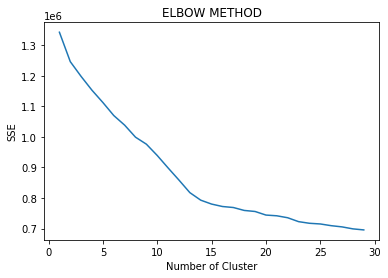

In [82]:
table_x = standardscaler.fit_transform(table_x)

sse = {}

for k in range(1,30): 
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(table_x)
  sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  print("For cluster = {}, SSE is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.title("ELBOW METHOD")
plt.show()

As we can see, according to the Elbow method, the number of ideal clusters is to be found within the interval [14,16], nevertheless it can be noted that the decrease of SSE is not rapid but very gradual. Furthermore, the SSE values are very high.

The optimal values for K: {14,15,16} 

Therefore we decided to change the scaler type, this time using RobustScaler() and rerun the "Elbow method" code.

**Robust Scaled Data**

For cluster = 1, SSE is 2256404.247882434
For cluster = 2, SSE is 1406515.3496488002
For cluster = 3, SSE is 1260018.5670200482
For cluster = 4, SSE is 1211186.7179215036
For cluster = 5, SSE is 1170566.318341126
For cluster = 6, SSE is 1130355.7779817104
For cluster = 7, SSE is 1088985.7387472047
For cluster = 8, SSE is 1057374.3783012547
For cluster = 9, SSE is 1043556.2683655985
For cluster = 10, SSE is 1003525.0151124467
For cluster = 11, SSE is 983016.1327037149
For cluster = 12, SSE is 947707.9391931174
For cluster = 13, SSE is 915025.9255378832
For cluster = 14, SSE is 883582.1406485497
For cluster = 15, SSE is 848942.4508552185
For cluster = 16, SSE is 839038.5975099897
For cluster = 17, SSE is 805218.9741747946
For cluster = 18, SSE is 782008.3896821329
For cluster = 19, SSE is 763574.623237051
For cluster = 20, SSE is 759667.4882946699
For cluster = 21, SSE is 750069.51710959
For cluster = 22, SSE is 743562.8623050828
For cluster = 23, SSE is 739697.2164627677
For cluster = 2

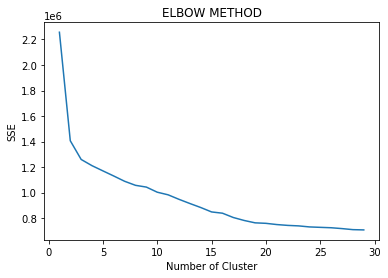

In [83]:
table_x = robustscaler.fit_transform(table_x)
sse = {}

for k in range(1,30): 
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(table_x)
  sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  print("For cluster = {}, SSE is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.title("ELBOW METHOD")
plt.show()

As we can see, the graph has a much more evident "elbow" and the optimal K number is now to be found in the interval [4,6]. 

The optimal values for K: {4,5,6} 

**MinMax Scaled Data**

For cluster = 1, SSE is 108246.09720015603
For cluster = 2, SSE is 96621.8526602568
For cluster = 3, SSE is 89852.6834414654
For cluster = 4, SSE is 84693.92499007321
For cluster = 5, SSE is 79001.41563469774
For cluster = 6, SSE is 72875.0285506228
For cluster = 7, SSE is 70380.61105380271
For cluster = 8, SSE is 68209.90147130685
For cluster = 9, SSE is 66278.65869245314
For cluster = 10, SSE is 64868.096528019065
For cluster = 11, SSE is 63046.842400468086
For cluster = 12, SSE is 61776.13224508019
For cluster = 13, SSE is 60657.063602014045
For cluster = 14, SSE is 59474.85328762835
For cluster = 15, SSE is 58635.51005535087
For cluster = 16, SSE is 58245.84099166494
For cluster = 17, SSE is 56934.305453567125
For cluster = 18, SSE is 56316.62144633733
For cluster = 19, SSE is 55958.940278648945
For cluster = 20, SSE is 55261.96740001406
For cluster = 21, SSE is 54761.36931711485
For cluster = 22, SSE is 53749.38021904373
For cluster = 23, SSE is 53019.845159322904
For cluster = 24

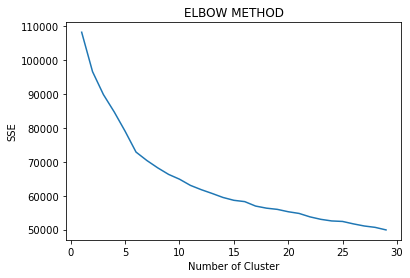

In [84]:
table_x = minmax.fit_transform(table_x)

sse = {}

for k in range(1,30): 
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(table_x)
  sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  print("For cluster = {}, SSE is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.title("ELBOW METHOD")
plt.show()

The SSE values are lower than the StandardScaler() and RobustScaler(), however the curve gradually decreases without finding a very evident elbow.

The optimal values for K: {5,6,15} 

We'll calculate the silhouette coefficient as a second criteria to choose the number of clusters.

#### Silhouette score

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. The silhouette ranges from -1 to 1, where a high value indicates that the observation is well matched to its own cluster,instead a low value it means it's poorly matched.

As we said before,in this second criterion we will test only the optimal K values that we have found for each scaler in the last section.

**Standard Scaled Data**

According the Elbow method with standar scaled data the optimal values of K to test: {14,15,16} 

For n_clusters = 14 The average silhouette_score is : 0.20169265706196074
For n_clusters = 15 The average silhouette_score is : 0.17686879230414193
For n_clusters = 16 The average silhouette_score is : 0.16654495647914017


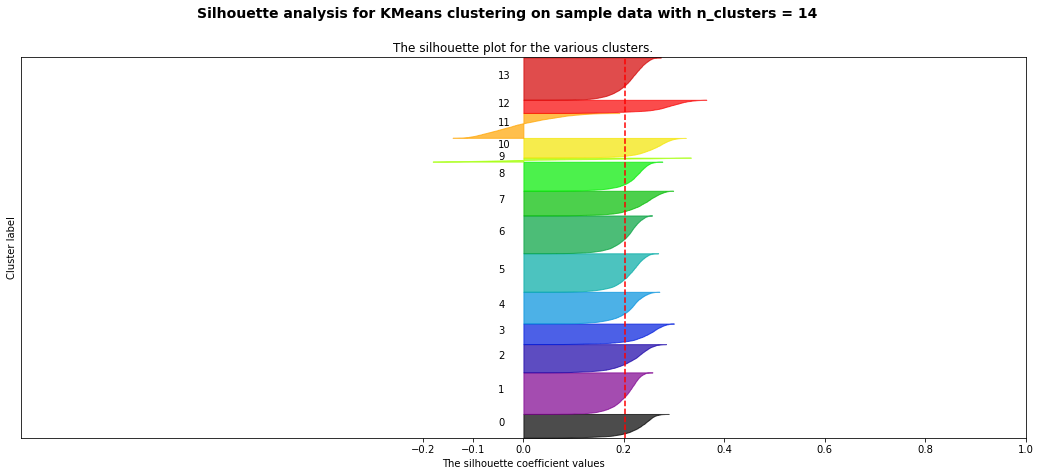

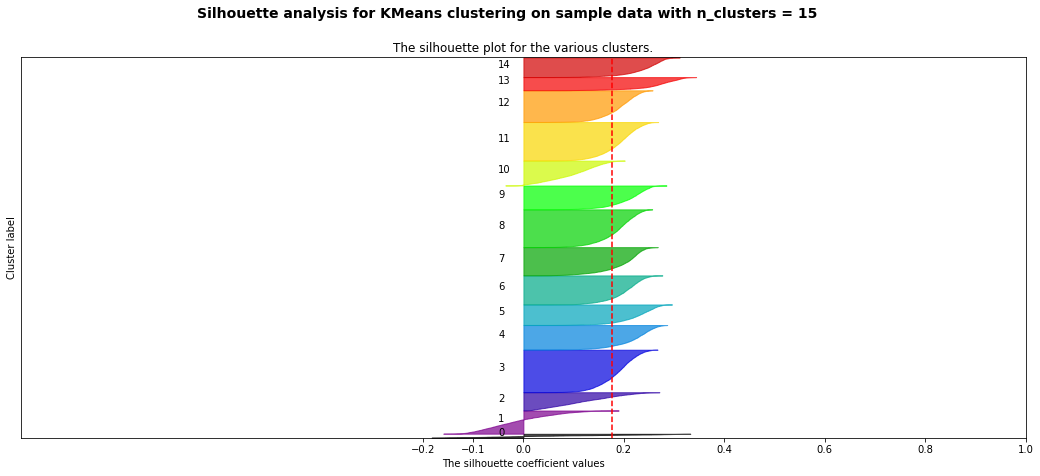

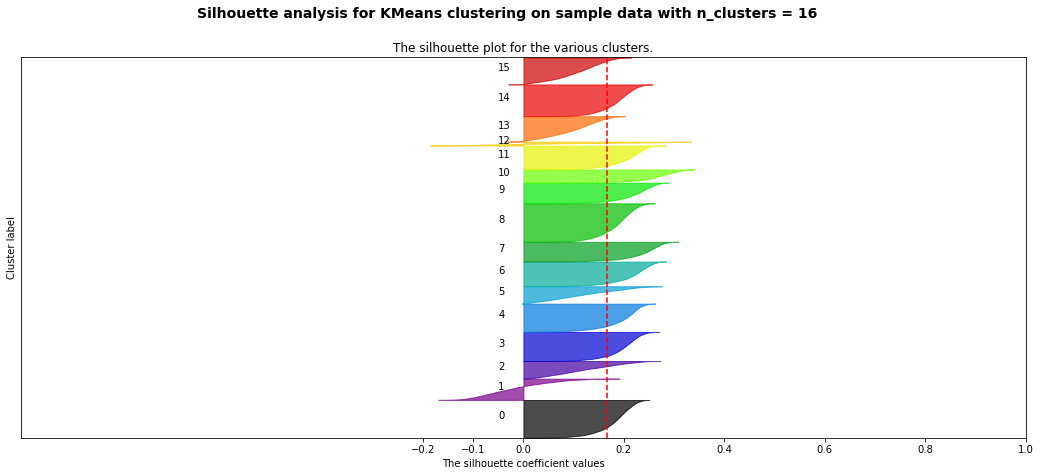

In [85]:
table_x = standardscaler.fit_transform(table_x)

range_n_clusters = [14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(table_x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(table_x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(table_x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(table_x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**MinMax Scaled Data**

According the Elbow method with minmax scaled data the optimal values of K to test:`{5,6,14} `.

For n_clusters = 5 The average silhouette_score is : 0.1720322904009167
For n_clusters = 6 The average silhouette_score is : 0.20285050845411443
For n_clusters = 15 The average silhouette_score is : 0.1511151796408126


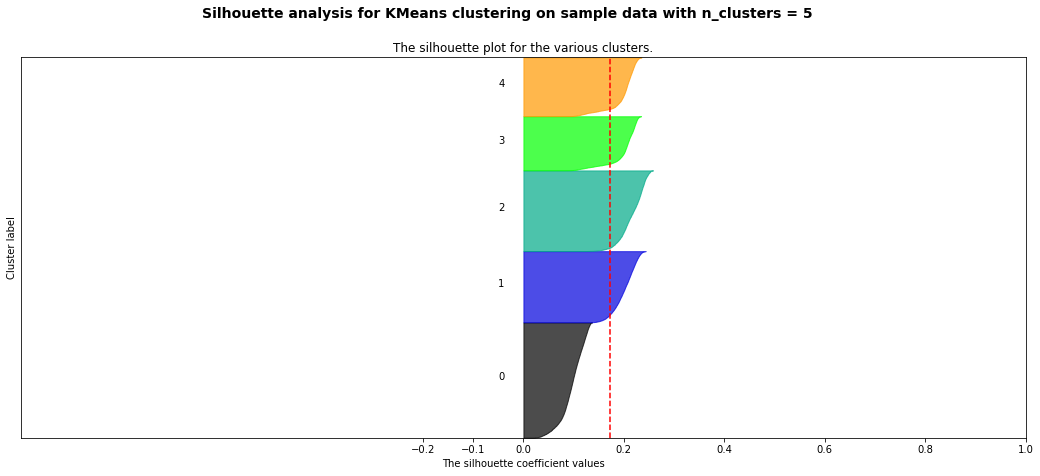

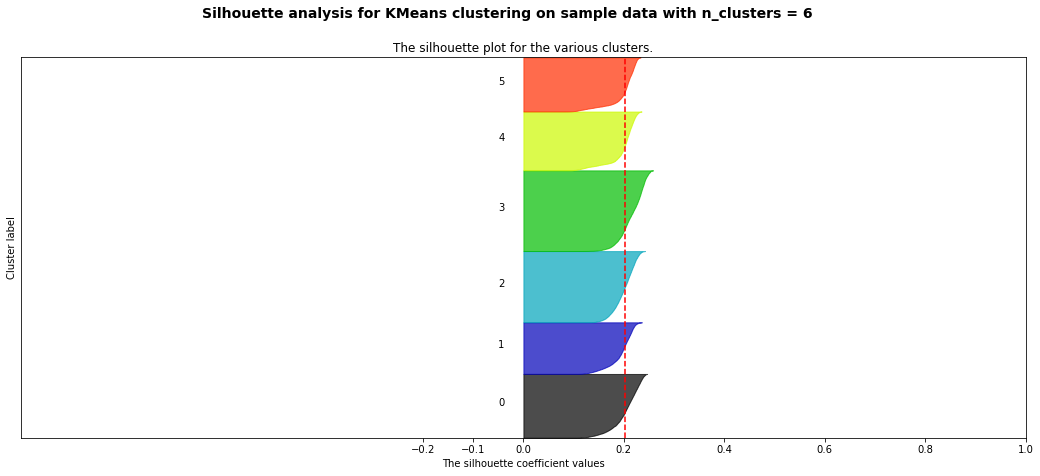

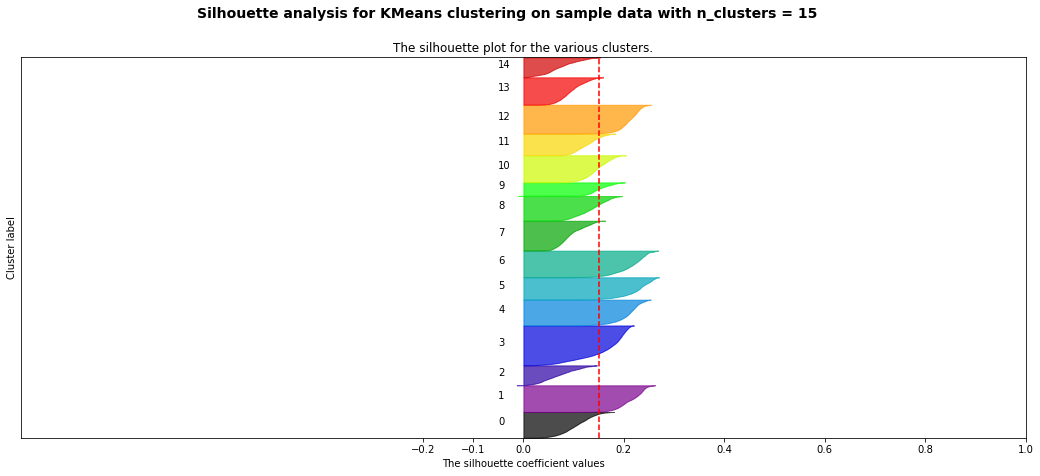

In [86]:
table_x = minmax.fit_transform(table_x)

range_n_clusters = [5,6,15]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(table_x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(table_x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(table_x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(table_x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Robust Scaled Data**

According the Elbow method with robust scaled data the optimal values of K to test: `{4,5,6}`.

For n_clusters = 4 The average silhouette_score is : 0.4388215408029953
For n_clusters = 5 The average silhouette_score is : 0.3954127146707645
For n_clusters = 6 The average silhouette_score is : 0.3981529328602522


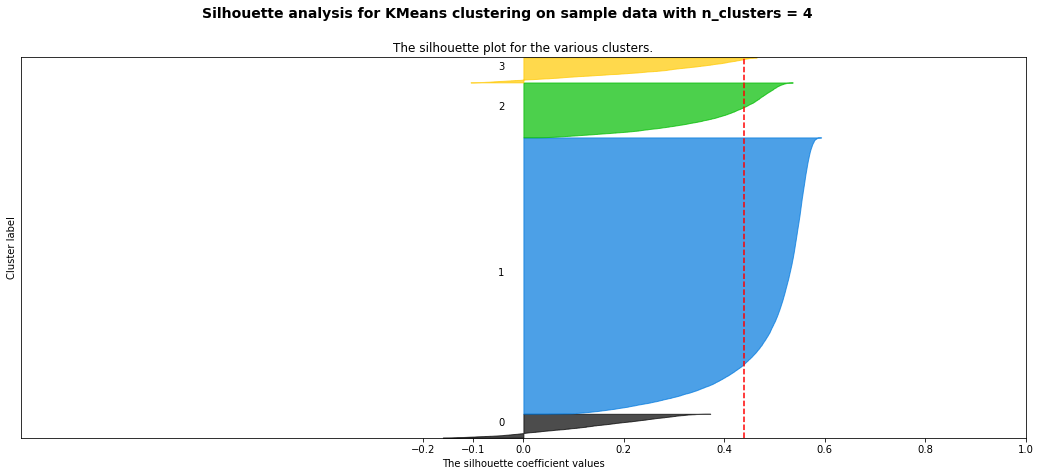

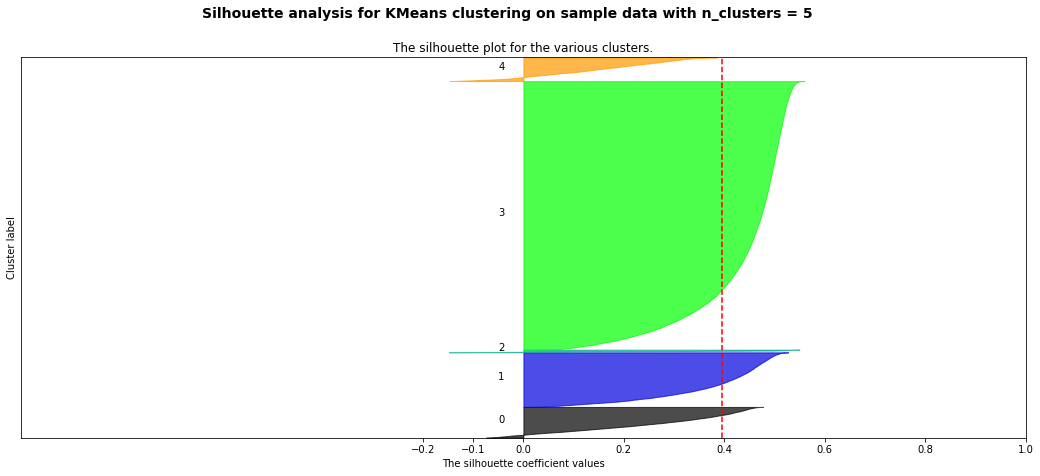

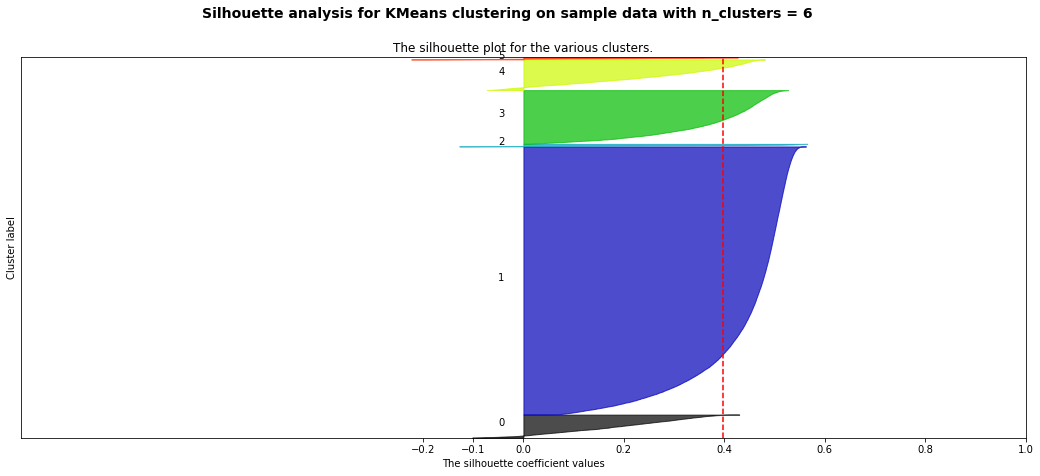

In [87]:
table_x = robustscaler.fit_transform(table_x)

range_n_clusters = [4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(table_x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(table_x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(table_x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(table_x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

With RobustScaler() the average silhouette scores are higher than those obtained by the other two scalers. For this reason we'll choose a RobustScaler in order to continue the clustering algorithm.

From the previous analyzes, we choose a number of clusters equal to K = 4.

### 2.2.3 Clustering - Results and Discussion 

We repeat now the K-means algorithm with `K=4`.

In [88]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4,init='k-means++', n_init=80 , random_state = 0,tol=0.0001,max_iter=500)
y_kmeans = kmeans.fit_predict(table_x)

silhouette_score(table_x, y_kmeans)

0.4388589807836794

In `y_kmeans` we have the cluster membership for each track.

In [89]:
cluster=pd.DataFrame(y_kmeans)
cluster['Index'] = range(1, len(cluster) + 1)
data['Index'] = range(1, len(data) + 1)
total=pd.merge(data,cluster,on='Index')
total=total.drop('Index', axis=1)
data=data.drop('Index', axis=1)
total.rename(columns={total.columns[20]: "Cluster"}, inplace = True)
total['Cluster'].astype(int)

0        0
1        0
2        3
3        1
4        0
        ..
40678    3
40679    0
40680    0
40681    0
40682    3
Name: Cluster, Length: 40683, dtype: int64

#### Characterization of tracks

With the following tables we see the median and the mean values of each variable within each group.
We use the median in addition to the mean because it is less influenced by the outliers which, as we have seen, are numerous in our dataset. Obviously a cluster of 4 groups does not allow them to be separated in detail.

In [90]:
total.groupby('Cluster').median()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,hit
Cluster,,,,,,,,,,,,,,,,
0,0.5670,0.6160,5,-8.7765,1,0.0412,0.247,0.000017,0.135,0.5960,118.1715,215.400,4,0.04,10,1
1,0.4180,0.4120,5,-13.7170,1,0.0426,0.648,0.867000,0.116,0.3090,115.0650,216.690,4,0.04,10,0
2,0.6725,0.6790,6,-7.2600,1,0.2870,0.139,0.000000,0.173,0.5865,110.3370,225.455,4,0.04,10,1
3,0.4760,0.5835,5,-10.8855,1,0.0450,0.234,0.406000,0.126,0.4225,117.9570,247.980,4,0.04,11,0


In [91]:
total.groupby('Cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,hit
Cluster,,,,,,,,,,,,,,,,
0,0.557240,0.598416,5.214411,-9.373646,0.719551,0.054027,0.340822,0.009755,0.200771,0.580736,120.010016,225.310957,3.904849,0.039585,10.164570,0.599513
1,0.423270,0.454988,5.089082,-14.655906,0.618975,0.055864,0.527362,0.845878,0.179871,0.375739,115.729167,253.207353,3.816386,0.042078,10.987055,0.069664
2,0.654997,0.648691,5.458894,-8.587967,0.606129,0.331691,0.273830,0.013281,0.257714,0.565101,120.272926,234.782448,3.939088,0.040366,10.384903,0.566517
3,0.473456,0.561925,5.230679,-11.883528,0.644809,0.061666,0.378479,0.408799,0.203702,0.448483,118.667591,301.234926,3.887198,0.041737,12.915691,0.185402


With the following codes we see the number of tracks in each cluster.

The algorithm has identified a small cluster composed of 173 tracks, while the other three clusters are more numerous.


The least numerous cluster is characterized by not very danceable songs, low loudness and valence values. Furthermore, these songs are mainly instrumental and have a very long duration (median = 20 min, mean = 22 min). Only 4% of these songs are hits.

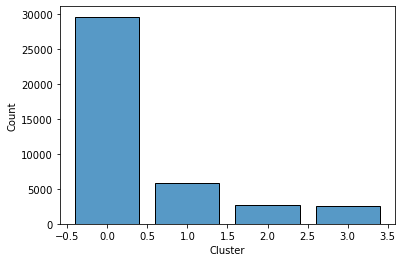

In [92]:
sns.histplot(data=total, x="Cluster",stat='count',discrete=True,shrink=.8)
plt.show()

In [93]:
pd.crosstab(index=total["Cluster"],  
            columns="count")                

col_0,count
Cluster,
0,29574
1,5871
2,2676
3,2562


In the following output we see the number of hits and flop tracks within each group.

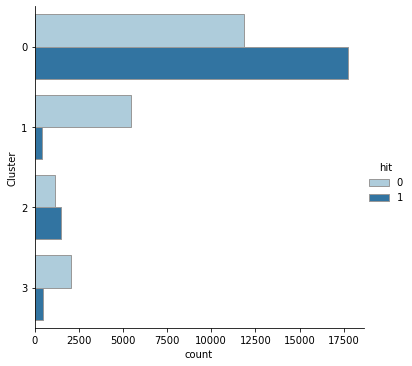

In [94]:
sns.catplot(y="Cluster", hue="hit", kind="count",
            palette="Paired", edgecolor=".6",
            data=total)

**Question**: Is it possible to find groups of tracks which are composed of hit songs with similar valences? Are tracks possibly grouped by decade?

From the results of our clustering it is not possible to find cluster groups with only hit songs and with similar valances.
We can find within these clusters, subgroups of songs that are hit songs and with values of variance similar to each other as we can see in the following "catplot".

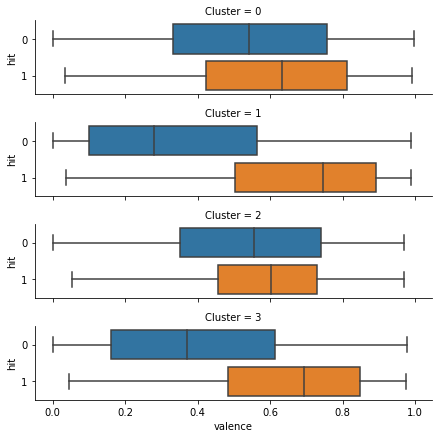

In [95]:
sns.catplot(x="valence", y="hit", row="Cluster",
            kind="box", orient="h", height=1.5, aspect=4,
            data=total)

The explanation we give is that, although as we have seen in the association rules there is a positive association between DISCRETE VALENCE = Positive and hits, the percentage of hit songs within this category is not that high (60%).
This is even less true for categories with lower valence.

In this case it might be useful to apply a clustering algorithm within each group to see if the tracks are divided into hit and flop and have similar valence.

In [96]:
total["DISCRETE_VALENCE"] = pd.cut(total.valence,[0, 0.33,0.66, 1], labels=["Negative", "Neutral","Positive"], include_lowest=False, right=True)
total['DISCRETE_VALENCE'][total.valence == 0] = "Negative"

In [97]:
prov = total.groupby('DISCRETE_VALENCE')  

In [98]:
prov.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,hit,Cluster
DISCRETE_VALENCE,,,,,,,,,,,,,,,,,
Negative,0.398303,0.451858,5.109735,-12.717105,0.670308,0.068037,0.477078,0.308293,0.194443,0.182703,115.223581,263.979124,3.802673,0.041895,11.416992,0.301014,0.688451
Neutral,0.539507,0.583585,5.296830,-9.589828,0.692737,0.078424,0.344064,0.115537,0.209056,0.500503,119.166123,233.879385,3.889561,0.039943,10.387601,0.516313,0.431989
Positive,0.632437,0.658530,5.200949,-9.231240,0.708035,0.071098,0.312653,0.093499,0.199300,0.821527,122.214000,216.096962,3.957158,0.039141,9.922117,0.602912,0.347809


Regarding "decade" in each group, only in one of the four groups we find a predominance of tracks belonging to the 60s.
Nevertheless, tracks from other decades are also present in that group.
In the other groups, on the other hand, there is no predominance for a certain decade.

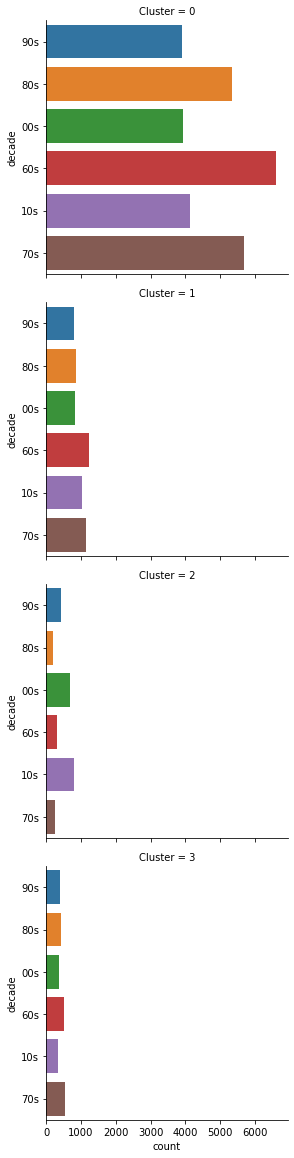

In [99]:
sns.catplot(y="decade", row="Cluster",data=total,orient="h", kind="count",height=4)

To see if the k-means algorithm is actually able to identify groups of tracks belonging to the same decade we applied groupby() function to group the data on decade.

Then,we calculated the mean of each variable in each group.
What we find is that the means of each variable do not vary much between decades.

In [100]:
data.groupby('decade').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,hit
decade,,,,,,,,,,,,,,,,
00s,0.541404,0.694310,5.270812,-7.461942,0.644560,0.092338,0.215196,0.152948,0.196038,0.480523,121.688288,258.249492,3.913126,0.040782,11.058377,0.492919
10s,0.567655,0.666645,5.286236,-7.623955,0.643992,0.098363,0.218458,0.168019,0.196668,0.442152,122.349264,236.601618,3.929593,0.041133,10.305785,0.491577
60s,0.492214,0.445122,5.076781,-12.031646,0.755530,0.062420,0.615645,0.150041,0.213481,0.574967,115.133622,183.637959,3.817024,0.038910,8.884771,0.499595
70s,0.524583,0.527126,5.213836,-11.762947,0.720399,0.062223,0.436083,0.164405,0.199980,0.595050,118.915217,240.018578,3.884090,0.039902,10.766474,0.490286
80s,0.563619,0.607218,5.229936,-11.059204,0.687756,0.058047,0.294643,0.141210,0.201705,0.587530,120.683659,254.473666,3.925747,0.039731,11.270211,0.494142
90s,0.566893,0.602246,5.263043,-10.235112,0.669565,0.073996,0.291220,0.159886,0.197202,0.537685,118.840424,256.211027,3.922464,0.041031,11.128261,0.500000


For this reason we believe that the k-means algorithm, using the distance between the mean, is not able to group clusters of songs of the same decade.

# Task 1.1. (Supervised Learning) - Predicting Hit or Flop

This section will target the **binary classification task**, where the target is `hit`. 
Hit is a dummy variable that has value:
* `0` if the track is a flop
* `1` if the track is a hit.

We used **supervised learning** algorithms for **predicting hit**.

We define the following function `starting_split` in Python to convert a dataframe to darray (format required in scikit-learn) and to create separate darrays for the features and for the target.
The function automatically excludes the first three columns (`track`, `artist`, `uri`) that are not useful.

In [101]:
def starting_split (fname):
  nc = fname.shape[1]
  matrix = fname.values
  table_X = matrix [:, 3:nc-1]
  table_y = matrix [:, nc-1]          
  features = fname.columns.values[3:nc-1]
  target = fname.columns.values[nc-1]
  return table_X, table_y, features, target

As we were asked, we will use cross validation to fit the model and evaluate each classifier.

In particular, we'll use K Fold cross validation and Statified K Fold cross validation.

**K Fold Cross-validation** starts by shuffling the data (to prevent any unintentional ordering errors) and splitting it into k folds. Then k models are fit on $\frac{k-1}{k}$ of the data (called the training split) and evaluated on $\frac{1}{k}$  of the data (called the test split).

For this purpose,we mainly used the following functions of sklearn package:

*  `cross_val_score()`: will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.

* `cross_validate()`: differs from cross_val_score in three ways:

    * It allows specifying multiple metrics for evaluation.

    * It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

    * it useful to retain the estimator fitted on each training set by setting `return_estimator=True`.

*  `cross_val_predict()`: has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used.


The following sections are divided into:
1.   Pre-processing data for classification
2.   Learning Classifiers
3. Results of classification (classification evaluation)

Each of these sections is in turn divided into: Tree model, Linear model, Distance based model and Probabilistic model.

`Notes:` Our approach to coding has been to focus one classifier at a time producing the preprocessing, classifier learning and results sections. **For this reason it is advisable to run the codes of these sections ONE CLASSIFIER AT A TIME to avoid problems due to overwriting.**



### 1.1.1 Preprocessing data for classification

#### Ordinal Encoded 

The following dataframe will be the starting point for the tree model and for the Multi-Layer Perceptron.

In [102]:
data_ord=data.copy(deep=True)

We chose to ordinal encode the variable `decade`.

This variable will assume integer values depending on the categories:


*   '60s': 1
*   '70s': 2
*   '80s': 3
*   '90s': 4
*   '00s': 5
*   '10s': 6


In [103]:
#establish the dictionary to use for ordinal encoding
dictionary=[{'col':'decade',
            'mapping':{'60s':1,'70s':2,'80s':3,'90s':4,'00s':5,'10s':6}}]

encoder=ce.OrdinalEncoder(cols='decade',mapping=dictionary)
data_ord=encoder.fit_transform(data_ord)
#convert decade's type to int
data_ord['decade']=data_ord['decade'].astype(int)
display(data_ord.dtypes)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_s          float64
time_signature        int64
chorus_hit          float64
sections              int64
decade                int64
hit                   int64
dtype: object

#### Tree model

Tree models are a family of supervised models which perform classification and regression tasks by building a tree-like structure for deciding the target variable class or value, according to the features and their weights.

##### Strict data preprocessing

In [104]:
data_tree=data_ord.copy(deep=True)

Now we'll trasform the dataframe into darray and prepar it for the tree model's classifier.

In [105]:
table_X_tree, table_y, features, target= starting_split(data_tree)

In [106]:
table_X_tree = np.array(table_X_tree, dtype=float)

In [107]:
table_y = np.array(table_y,dtype=int)

##### Prep the data
In this section we will apply some transformation to the data to ensure that the model could be easily read.


To have some options, different scalers will be tested.
While that might seem redundant, the Exploratory Data Analysis showed some issues with some variables, so we want to set our model up for success, by trying different options, which are:
1. Standard Scaler, a classic;
2. Robust Scaler, it might be a good option because there are some outliers;
3. MinMax Scaler, another classic.

In [108]:
table_X_tree_stsc=standardscaler.fit_transform(table_X_tree)
table_X_tree_rosc=robustscaler.fit_transform(table_X_tree)
table_X_tree_mima=minmax.fit_transform(table_X_tree)

#### Linear model

Linear models are widely applied models that offer a way of describing a response variable in terms of a linear combination of predictor variables. 

##### Logistic Model

The choice of a logistic regression as a classifier within the linear models category was based on the fact that our target variable is a dummy that takes values of 1 or 0.

The logistic function fits very well because it has a S-shaped curve that can take any real-valued number and map it into a value between 0 and 1.
This is exactly our case.

In [109]:
data_nocorr=data.copy(deep=True)

We decided to delete some highly correlated variables (>0.7) because it becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable *independently* because the independent variables tend to change in unison.

Consequently, high correlations create two main types of problems:
* The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
* Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of our regression model.

Firstly, we create dummies for the variables `decade` and `key`. To avoid multicollinearity, we will create `K-1` dummies.
We then move `hit` as the last column of the DataFrame to use `starting_split`.

In [110]:
data_nocorr=pd.get_dummies(data=data_nocorr, columns=['decade','key'],drop_first=True,dtype='int')
col = data_nocorr.pop("hit")
data_nocorr.insert(33, col.name, col)

We now check what is the baseline for the dummies.

The baseline for `key` is `12`.

The baseline for `decade` is `00s`.

In [111]:
data_nocorr.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_s', 'time_signature', 'chorus_hit',
       'sections', 'decade_10s', 'decade_60s', 'decade_70s', 'decade_80s',
       'decade_90s', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'hit'],
      dtype='object')

We now remove a variable for each of the highly correlated pairs.
Based also on the results of other models we decided to remove `energy`, as it's highly correlated with both `acousticness` and `loudness` and `sections`, which might be harder to interpret than `duration_s`.

In [112]:
data_nocorr = data_nocorr.drop(['energy','sections',],axis=1)

In [113]:
table_nocorr,table_y, features_nocorr,target= starting_split(data_nocorr)
table_nocorr = np.array(table_nocorr, dtype=float)
table_y = np.array(table_y,dtype=int)

We apply a simple MinMax transformation to get a better performance.

In [114]:
stand = MinMaxScaler()
table_nocorr = stand.fit_transform(table_nocorr)

##### Multi-Layer Perceptron

A perceptron can be used as a binary classification model since it defines a linear decision boundary. It finds the separating hyperplane that minimizes the distance between misclassified observations and the decision boundary.

The development of the Multi-Layer Perceptron model has proven itself to be very computationally "heavy" on our poor computers, that are now officially on a strike.

This is the reason why you might find this section to follow a different logic than most of the other sections.

The dataset we are going to use is the one with the Ordinal Encoded variable. We are going to apply a MinMax transformation on this dataset.

In [115]:
table_X_neur, table_y, features, target= starting_split(data_ord)

In [116]:
table_X_neurmima=minmax.transform(table_X_neur)

#### Distance-based model & Probabilistic model 

Distance based models compute the geometry of data, much like linear models, calculating distances between queries and a number of internally stored exemplars.

Probabilistic models use the codes of statistics for data examination, taking into account the impact of random events in predicting the potential occurrence of future outcomes.

In [117]:
table_X, table_y, features, target= starting_split(data)

We decide to encode the categorical variable `decade` and with one hot encoder (OHE) for using it for the other models. 
We then convert the type of the arrays.

In [118]:
num_of_rows = table_X.shape[0]
table_X = ohe_encode_feature(table_X, 15, num_of_rows, 6)
table_X = np.array(table_X, dtype=float)
table_y =np.array(table_y,dtype=int)

### 1.1.2 Learning Classifiers

#### Tree model

##### Why fine-tuning?

The full unpruned tree would be to large to lead to an interpretation. This is the reason why we need to stop the growth of the tree before it becomes too much to handle. Thankfully, the DecisionTreeClassifier function has some hyperparameters we can test so that we have a satisfying level of accuracy and we still produce an output that can be read and interpreted.

##### Grid Search
In this section we will be using `GridSearchCV` to get the best solution between a combination of different hyperparameters. The ones that can be chosen for a DecisionTreeClassifier() are:

* `ccp_alpha`: it's a cost complexity parameter, i.e. a tree pruning technique to control the size of a decision tree. Increasing its value increases the amount of nodes pruned.

* `criterion`: Criterion measures the quality of a split, with support criteria being `gini` for purity and `entropy` for information gain.

* `max_depth`: This hyperparameter represents the maximum depth of the tree (number of edges from the node to the tree's root node). It can have values ranging from 0, in which case the tree will continue until all leaves are pure, to a defined number.

In particular we'll choose:

**Criterion**

> We want to evaluate the performance with both the `gini` criterion and the `entropy`.



**Alpha**


> The values that will be tested will be: `[0.00021, 0.00022, 0.00023823, 0.00024, 0.00025, 0.00025376, 0.00025562,0.00026, 0.00027]`. On Scaled data, this values will be adjusted as we go.

**Max_Depth**


> The values that will be tested will be: `[9,10,11,12,13,14,15,16,17,18,19]`





In the next sections we will analyze how the optimal parameters and the accuracy scores change with the variation of the type of scaler used and in the case of discretization of continuous variables.

**Raw Data**

In [128]:
tree_parameters = {'criterion':['gini','entropy'],
                   'ccp_alpha':[0.00021,0.00022,0.00023823,0.00024,0.00025,0.00025376,0.00025562,0.00026,0.00027],
                   'max_depth':range(9,19)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_parameters, cv=10)
grid_tree = grid_tree.fit(table_X_tree, table_y)

In [129]:
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)
print(grid_tree.best_score_)

{'ccp_alpha': 0.00027, 'criterion': 'entropy', 'max_depth': 14}
DecisionTreeClassifier(ccp_alpha=0.00027, criterion='entropy', max_depth=14)
0.7691414604947642


Using untreated data will result in an accuracy level of 76,91%. Let's check if we can improve that.

**Standard Scaled data**

In [130]:
tree_parameters_stsc = {'criterion':['gini','entropy'],
                   'ccp_alpha':[0.00029, 0.0003,0.00031],
                   'max_depth':range(9,19)}
grid_tree_stsc = GridSearchCV(DecisionTreeClassifier(), tree_parameters_stsc, cv=10)
grid_tree_stsc = grid_tree_stsc.fit(table_X_tree_stsc, table_y)

In [131]:
print(grid_tree_stsc.best_params_)
print(grid_tree_stsc.best_estimator_)
print(grid_tree_stsc.best_score_)

{'ccp_alpha': 0.0003, 'criterion': 'entropy', 'max_depth': 14}
DecisionTreeClassifier(ccp_alpha=0.0003, criterion='entropy', max_depth=14)
0.7705672587878757


The best performance we obtain is `77.06%`.

**Robust Scaled data**

In [132]:
tree_parameters_rosc = {'criterion':['gini','entropy'],
                   'ccp_alpha':[0.00031,0.00029,0.0003],
                   'max_depth':range(13,15)}
grid_tree_rosc = GridSearchCV(DecisionTreeClassifier(), tree_parameters_rosc, cv=10)
grid_tree_rosc = grid_tree_rosc.fit(table_X_tree_rosc, table_y)

In [133]:
print(grid_tree_rosc.best_params_)
print(grid_tree_rosc.best_estimator_)
print(grid_tree_rosc.best_score_)

{'ccp_alpha': 0.0003, 'criterion': 'entropy', 'max_depth': 14}
DecisionTreeClassifier(ccp_alpha=0.0003, criterion='entropy', max_depth=14)
0.7705672587878757


The best performance we can obtain is `77.06%`, roughly as before.

**MinMax scaled data**

In [119]:
tree_parameters_mima = {'criterion':['gini','entropy'],
                   'ccp_alpha':[0.00021,0.00022,0.00023823,0.00024,0.00025,0.00025376,0.00025562,0.00026,0.00027],
                   'max_depth':range(9,19)}
grid_tree_mima = GridSearchCV(DecisionTreeClassifier(), tree_parameters_mima, cv=10)
grid_tree_mima = grid_tree_mima.fit(table_X_tree_mima, table_y)

In [120]:
print(grid_tree_mima.best_params_)
print(grid_tree_mima.best_estimator_)
print(grid_tree_mima.best_score_)

{'ccp_alpha': 0.00027, 'criterion': 'entropy', 'max_depth': 14}
DecisionTreeClassifier(ccp_alpha=0.00027, criterion='entropy', max_depth=14)
0.7690431381191651


With these values, the best accuracy we can achieve is `76.90%`. Let's give it another shot.

In [121]:
tree_parameters_mima1 = {'criterion':['gini','entropy'],
                   'ccp_alpha':[0.000315,0.00032,0.00033],
                   'max_depth':range(12,15)}
grid_tree_mima1 = GridSearchCV(DecisionTreeClassifier(), tree_parameters_mima1, cv=10)
grid_tree_mima1 = grid_tree_mima1.fit(table_X_tree_mima, table_y)

In [122]:
print(grid_tree_mima1.best_params_)
print(grid_tree_mima1.best_estimator_)
print(grid_tree_mima1.best_score_)

{'ccp_alpha': 0.000315, 'criterion': 'entropy', 'max_depth': 14}
DecisionTreeClassifier(ccp_alpha=0.000315, criterion='entropy', max_depth=14)
0.7709113901231291


In [123]:
tree_final=grid_tree_mima1.best_estimator_

This gives an accuracy of `77.09%`. This is a satisfying result.
The best hyperparameters turned out to be `ccp_alpha=0.000315`, `criterion='entropy'`, `max_depth=14`, using a MinMax Scaler.

To avoid going through all of the computational complexity again, we will save the fitted model in a `pickle`.

In [124]:
with open('tree_final', 'wb') as files:
    pickle.dump(tree_final, files)

We now print and admire our tree.

In [125]:
with open('tree_final' , 'rb') as f:
    tree_final = pickle.load(f)

In [126]:
dot_data = tree.export_graphviz(tree_final, out_file="final_tree.dot",
                                feature_names=features,
                                class_names=["flop","hit"],
                                filled=True, rounded=True,
                                special_characters=True)

(graph,) = pydot.graph_from_dot_file('final_tree.dot')
graph.write_png('final_tree.png')

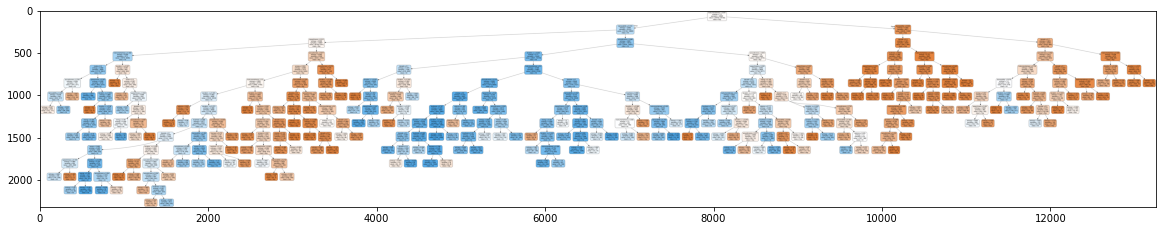

In [127]:
img = mpimg.imread('final_tree.png')
plt.figure(figsize = (20,20))
imgplot = plt.imshow(img)

#### Linear model

##### Logistic Regression

In a logistic regression the parameters can be chosen are:



1.   `Penalty`: This hyperparameter imposes a penalty to the logistic model when it has too many variables. This results in coefficient shrinkage of less contributive variables down to zero. 
Below, it takes values: 
  * `'l1’`: L1 regularization adds an L1 
penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients.

    * `‘l2’`: L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor

  * `'none'`: This value implies no penalty is used


2. `solver`: This hyperparameter represents the algorithm to use in the optimization problem. The following solvers are used below:

  * `'sag'`, known as the Stochastic Average Gradient, optimizes the sum of a finite number of smooth convex functions, and supports L1 penalties. It is faster than many other solvers for large datasets.

  * `'saga'`: The SAGA solver is a variant of SAG that also supports the non-smooth penalty L1 option. It is the solver of choice for sparse multinomial logistic regression and for very large datasets

  * `‘newton-cg’`: Newton’s method uses quadratic function minimisation with approximation. It is essentially a Gradient Descent with the Hessian Matrix, although this makes it computationally expensive.

  * `'lbfgs'`: Also known as Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm, it functions using a Hessian matrix, generating approximations using updates specified by gradient evaluations. Since it stores only a few vectors that represent the approximation implicitly, it saves a lot of memory, although it is unsafeguarded, and may not converge to anything.

3. `C`: The Hyperparameter C is the the inverse of regularization strength (Lambda) in Logistic Regression and Support Vector Machines. Lower values imply stronger regularization, which shrink the coefficient estimates.



To perform the Grid Search, we first have to set the parameters we want to explore. We created a list for every penalty type, given that not every penalty is compatible with every solver. Compatibilities were consulted in the scikit learn page for Logistic Regression.

In [134]:
logregparameters= [
                     {"penalty": ["l2"], "C": [1.5,2,2.5,3], "solver":["lbfgs","newton-cg","sag"]},
                     {"penalty": ["l1"], "C": [1.5,2,2.5,3], "solver":["saga"]},
                     {"penalty": ["none"], "solver":["lbfgs","newton-cg","sag"]}
                     ]

In [135]:
logreg=LogisticRegression(max_iter=10000)

In [136]:
logreggrid = GridSearchCV(logreg, logregparameters, cv=10)
results = logreggrid.fit(table_nocorr, table_y)

In [137]:
print(logreggrid.best_score_)
print(logreggrid.best_params_)
bestlogreg=logreggrid.best_estimator_

0.7329085383815516
{'C': 1.5, 'penalty': 'l2', 'solver': 'lbfgs'}


In [138]:
with open('logreg_final', 'wb') as files:
    pickle.dump(bestlogreg, files)

The best model turned out to be the one where:

*   C: 1.5
*   penalty: l2
*   solver: lbfgs





In [139]:
scores = cross_val_score(bestlogreg, table_nocorr, table_y, cv=10, scoring='accuracy')

In [140]:
print("Accuracy of the classifier:",scores.mean())
print("Standard deviation of the classifier:",scores.std())

Accuracy of the classifier: 0.7329085383815516
Standard deviation of the classifier: 0.03045792860702074


##### Multi-Layer Perceptron

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

The parameters that can be chosen for a Multi Layer Perceptron are:

* `solver`: This represents the solver algorithm. In Perceptron weight optimization, it has 3 possible values, `'lbfgs'`, `‘sgd’` and `‘adam’`.
The adam solver is an extension to stochastic gradient descent optimization algorithms that maintains a single, constant learning rate (alpha) for all weight updates during training, which is separately adapted as learning unfolds.

* `hidden_layer_sizes`: It represents the number of neurons of the hidden layer, which is a layer in between input layers and output layers that is not directly observable.

* `activation`: Activation functions, such as this hidden layer activation function, are a critical part of the design of a neural network, the choice of which controls how well the network model learns the training dataset. The following are the possible inputs: 

  * `‘identity’`: no-op activation, useful to implement linear bottleneck, returns $f(x) = x$;      
  * `‘logistic’`, the logistic sigmoid function, returns $ f(x) = \frac{1}{1 + exp(-x)} $;      
  * `‘tanh’`, the hyperbolic tan function, returns $ f(x) = tanh(x) $;      
  * `‘relu’`, the rectified linear unit function, returns $ f(x) = max (0, x) $.

As we already specified, we had very high expectations for the performance of this model. We had a very intricate and extremely thorough Grid Search ready, when we got our reality check and realized that we couldn't do that in polynomial time.

This is specifically the reason why we used an approach that might be seen as... *Brute Force*, but, once again, we didn't have many options available.
The results we obtained in the fine tuning of the hyperparameters might not be the global optimal solution.

`max_iter`: Maximum number of iterations of the Perceptron. The solver will iterate until the number specified in this parameter, or until total convergence.

We decided without trying to up the `max_iter` parameter up to 10000 and use `solver = adam`.

In [141]:
mlpc=MLPClassifier(max_iter=10000, solver="adam")

In the first GridSearch we found the best combination of `hidden_layer_sizes` and `activation`.

In [146]:
parameter_space = {
    'activation': ['tanh', 'relu'],
    'hidden_layer_sizes':[100,200]
}
clsearch = GridSearchCV(mlpc, parameter_space, n_jobs=-1, cv=10)

We first fitted it on Unscaled Data, to highlight the importance of Scaling.

In [147]:
clsearch.fit(table_X_neur, table_y)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [100, 200]})

In [148]:
clsearch.best_score_

0.7779649799561303

The accuracy obtained was `77.79%`. Let's now fit it on data that was scaled with the `MinMaxScaler`.

In [149]:
clsearch.fit(table_X_neurmima, table_y)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [100, 200]})

In [150]:
print(clsearch.best_score_)
print(clsearch.best_params_)

0.7981952361585656
{'activation': 'relu', 'hidden_layer_sizes': 100}


The accuracy obtained now is up to `79.82%`. This was obtained with a `hidden_layer_sizes` of `200` and `activation` function `relu`.

Let's stress our computer a little more. We are happy with `hidden_layer_sizes=200`, but we want to test further the possible `activation` functions.

In [151]:
mlpc1=MLPClassifier(max_iter=10000, solver="adam", hidden_layer_sizes=200)

In [152]:
parameter_space1={
    'activation': ["identity", "logistic"]
}
clsearch1 = GridSearchCV(mlpc1, parameter_space1, n_jobs=-1, cv=10)

In [153]:
clsearch1.fit(table_X_neurmima, table_y)

GridSearchCV(cv=10,
             estimator=MLPClassifier(hidden_layer_sizes=200, max_iter=10000),
             n_jobs=-1, param_grid={'activation': ['identity', 'logistic']})

In [154]:
print(clsearch1.best_score_)
print(clsearch1.best_params_)

0.77916934598916
{'activation': 'logistic'}


Given this result, we retain `relu` as an activation function. We now just have to decide the value of alpha.

In [155]:
mlpc2=MLPClassifier(max_iter=10000, 
                    solver="adam",
                    hidden_layer_sizes=200, 
                    activation="relu")
parameter_space2={
    'alpha': [0.0001, 0.01, 0.1, 1]
}
clsearch2 = GridSearchCV(mlpc2, parameter_space2, n_jobs=-1, cv=10)

In [156]:
clsearch2.fit(table_X_neurmima, table_y)

GridSearchCV(cv=10,
             estimator=MLPClassifier(hidden_layer_sizes=200, max_iter=10000),
             n_jobs=-1, param_grid={'alpha': [0.0001, 0.01, 0.1, 1]})

In [157]:
print(clsearch2.best_score_)
print(clsearch2.best_params_)
mlpf=clsearch2.best_estimator_

0.7973348443866412
{'alpha': 0.0001}


Given the performance of the other models and given the fact that we have not used MLP to the best of its abilities, we can conclude that we have our final fine-tuned model.
Further comments about its performance will be evaluated in the next section.

We now save this model in a pickle.



In [158]:
with open('neural_final', 'wb') as files:
    pickle.dump(mlpf, files)

#### Distance-based model

##### **KNN (K-Nearest Neighbor) as a classifier**

For building a k-nearest neighbor classifier, we need to choose the value of `k`. The `k` in kNN tells the algorithm how to classify cases by copying the already-known classification of the k nearest neighbors, i.e. the k number of cases that are considered to be "nearest" in terms of distance in feature space.

Our goal is to choose the optimal value for `k` in order to have a better accuracy of the KNN classifier.
First, we'll use a Robust Scaler for finding the best k because we saw this scaler performed better in the k-means algorithm based on distance metrics.




In [160]:
trans = RobustScaler()
table_X = trans.fit_transform(table_X)

We used cross-validation to test several values of k in order to determine which works best for our data. We then plotted the corresponding accuracy obtained. We explored a range of values that goes from `1` to `30`. For `k>30` we saw the graph always decrease and the accuracy gets smaller and smaller.

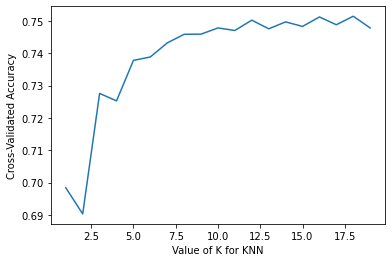

In [161]:
%matplotlib inline
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, table_X, table_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

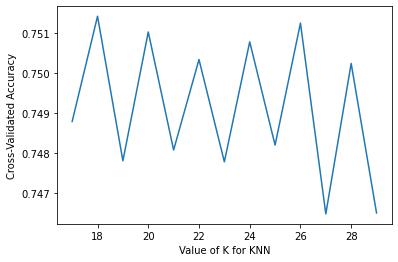

In [162]:
%matplotlib inline
k_range = range(17, 30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, table_X, table_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

The maximum accuracy peak is therefore obtained with `k = 18`.
We used Stratified K Fold to avoid problems of class imbalance within the folds created.

In [163]:
knn = KNeighborsClassifier(n_neighbors=18)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
knn_results = cross_val_score(knn, table_X, table_y, cv=skf,scoring='accuracy')
print("Accuracy of the classifier",knn_results)
print("Standard deviation of the classifier",knn_results.std())

Accuracy of the classifier [0.77365446 0.77021381 0.7721799  0.77605703 0.76917404 0.76204523
 0.76327434 0.77089479 0.77409046 0.77064897]
Standard deviation of the classifier 0.004260170417682024


As we can see using Stratified K-Fold Cross Validation the accuracy scores have increased.

Since the k-nn algorithm is sensitive to the presence of outliers, we wondered how the accuracy scores changed by changing the type of scaler used.

In [164]:
stand=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler(quantile_range=(25, 75))
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
knn = KNeighborsClassifier(n_neighbors=18)

print('MinMax scaler:')
table_X=minmax.fit_transform(table_X)
print(cross_val_score(knn, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
table_X=stand.fit_transform(table_X)
print(cross_val_score(knn, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
table_X=robust.fit_transform(table_X)
print(cross_val_score(knn, table_X, table_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.7551803356215412
Standard scaler:
0.7664873484023023
Robust scaler:
0.7716489559523007


`RobustScaler()` is less sensitive to outliers and ,in this case, it allows us to have a slightly higher accuracy. We will therefore use this scaler.

#### Probabilistic model

There are 3 main types of Naïve Bayes algorithm. The 3 types are listed below:
* **Gaussian Naïve Bayes**: is useful when working with continuous values which probabilities can be modeled using a Gaussian distribution
* **Multinomial Naïve Bayes**: is preferred to use on data that is multinomially distributed. 
* **Bernoulli Naïve Bayes**: is useful when features are independent boolean variables (binary variables)

Since most of our independent variables are continuous variables, we believe that `GaussianNB()` compared to the other two Naive Bayes classifiers is the most relevant to our dataset, even if the variables are not distributed like the gaussian distribution. 

To confirm what has been said, we will also try the `BernoulliNB()` classifier given the presence of some dummies variables.

##### Naive Bayes with GaussianNB as classifier

In [165]:
nb = GaussianNB()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
nb_results = cross_val_score(nb, table_X, table_y, cv=skf,scoring='accuracy')
print("Accuracy of the classifier",nb_results)
print("Standard deviation of the classifier",nb_results.std())

Accuracy of the classifier [0.7203244  0.70877365 0.70852789 0.71951819 0.71509341 0.6973943
 0.7114061  0.69764012 0.71337266 0.7020649 ]
Standard deviation of the classifier 0.007818751986210215


We also wondered if changing the type of scaler the accuracy score increased but we saw that this is irrelevant.

In [166]:
stand=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler(quantile_range=(25, 75))
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
nb = GaussianNB()

print('MinMax scaler:')
table_X=minmax.fit_transform(table_X)
print(cross_val_score(nb, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
table_X=stand.fit_transform(table_X)
print(cross_val_score(nb, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
table_X=robust.fit_transform(table_X)
print(cross_val_score(nb, table_X, table_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.7094115627838662
Standard scaler:
0.7094115627838662
Robust scaler:
0.7094115627838662


##### Naive Bayes with BernoulliNB as classifier

In [167]:
bern = BernoulliNB()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
nb_bern = cross_val_score(bern, table_X, table_y, cv=skf,scoring='accuracy')
print("Accuracy in each fold:" , nb_bern)
print("Average accuracy score:", nb_bern.mean())
print("Standard deviation of the classifier",nb_bern.std())

Accuracy in each fold: [0.69206193 0.68591792 0.6959941  0.69764012 0.69346116 0.6705998
 0.69616519 0.68018682 0.7020649  0.69174041]
Average accuracy score: 0.6905832356452957
Standard deviation of the classifier 0.008849067958469023


We also tried with different scalers and we saw that the accuracy changed.
Using a Standard scaler we have an accuracy which comes very close to what we had with GaussianNB().

In [168]:
print('MinMax scaler:')
table_X=minmax.fit_transform(table_X)
print(cross_val_score(bern, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
table_X=stand.fit_transform(table_X)
print(cross_val_score(bern, table_X, table_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
table_X=robustscaler.fit_transform(table_X)
print(cross_val_score(bern, table_X, table_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.616792978447252
Standard scaler:
0.6924266759751224
Robust scaler:
0.6905832356452957


As expected `GaussianNB()` allows us to have a slightly higher accuracy so we will continue with this classifier.

### 1.1.3 Classification - Results and Discussion 

In this section, we will evaluate and compare the different models.

The models will be evaluated on their performance in predicting the target variables. Their performance will be graphically shown through the confusion matrix.

In the case of our binary classification, each confusion matrix is divided into 4 parts:
* `True Positives (TP)`: is the number of actual hit songs correctly classified as hits.
* `True Negatives (TN)`: is the number of actual flop songs correctly classified as flop.
* `False Positives (FP)`: is the number of actual flop songs incorrectly classified as hits.
* `False Negatives (FN)`: is the number of actual hit songs incorrectly classified as flop.

We will comment on the following metrics:

*   **accuracy**, which is the percentage of correctly classified units.This is a good metric to use when there is a certain class balance, which seems to be the case.
*   **recall** (sensitivity), which is the percentage of correctly classified `hits` over the actual `hits`.
*   **precision**,which is the ratio of correctly classified hits to the total tracks classified as hits.
*   **F1 score**,  is a metric which takes into account both precision and recall.







We used the following function to create extremely pretty, ehm... functional confusion matrices for our classifiers.

In [169]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

#### Tree model





**Importance of the Features**

In [170]:
feature_importances = pd.DataFrame(tree_final.feature_importances_,
                                       index = features,
                                        columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
instrumentalness    0.422055
acousticness        0.141110
danceability        0.136257
duration_s          0.073100
speechiness         0.064121
decade              0.059561
energy              0.043312
loudness            0.024743
valence             0.014023
mode                0.008502
tempo               0.007476
sections            0.003604
liveness            0.002137
key                 0.000000
time_signature      0.000000
chorus_hit          0.000000


As we can see, the most important feature is `instrumentalness` by a long shot. 
As a matter of fact, it is the variable that creates the first split.
2 more variables worth mentioning are `acousticness` and `danceability`.
Variables with a modest importance are `duration`, `speechiness`, `decade` and `energy`.
All the other variables have negligible importance.

**Performance of the Model**

We create now the confusion matrix for evaluate the performance of our Tree model in predicting hit.

In [171]:
y_pred_tree = cross_val_predict(tree_final, table_X_tree_mima, table_y, cv=10)
conf_mat_tree = confusion_matrix(table_y, y_pred_tree)

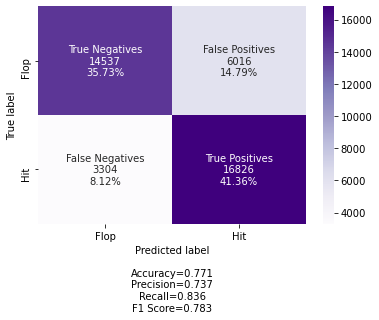

In [172]:
labels = ["True Negatives","False Positives","False Negatives","True Positives"]
categories = ["Flop", "Hit"]
make_confusion_matrix(conf_mat_tree, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Purples")

As with the other classifiers, we calculate the accuracy, recall and F1-score for `flop` and `hit`.

In [173]:
print(metrics.classification_report(table_y,y_pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     20553
           1       0.74      0.84      0.78     20130

    accuracy                           0.77     40683
   macro avg       0.78      0.77      0.77     40683
weighted avg       0.78      0.77      0.77     40683



`77.1%` of the songs are correctly classified.
Of those classified as hits, `81%` are actually hits.
Instead, of those classified as flops, `74%` are actually flops.

Therefore, the model is more prone to accurately predict hits. As we can see, the model was able to catch `84%` of hits, which is a satisfying performance.

The F-score is also reasonable enough.

#### Linear model

##### Logistic Regression

In [174]:
with open('logreg_final' , 'rb') as f:
    bestlogreg = pickle.load(f)

In [175]:
bestlogreg

LogisticRegression(C=1.5, max_iter=10000)

**Importance of the Features**

We will first analyze the importance of the coefficients, then we will evaluate the performance of the model.

Text(0, 0.5, 'Coefficient magnitude')

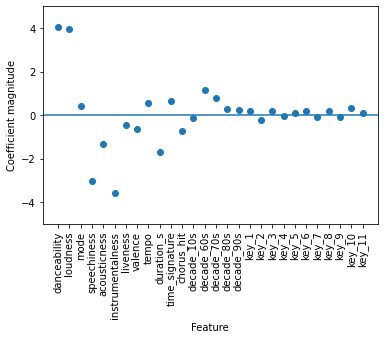

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(bestlogreg.coef_.T, 'o')

plt.xticks(range(table_nocorr.shape[1]), features_nocorr, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

The most important variables appear to be `danceability`, `loudness`, `instrumentalness` and `speechiness`. Other important variables are `duration` and `acousticness`. All the other features have coefficients with low magnitude.

This graph also allows us to understand the sign of the impact of these variables on hit. 

In particular, an increase in the values of '`danceability`' and '`energy`' increases the probability that the song is a hit song, on the contrary an increase in the values of '`speechiness`', `'instrumentalness`' and '`duration_s`' decreases this probability.

**Performance of the Model**

We create now the confusion matrix to evaluate the performance of Logistic Classifier in predicting `hit`.

In [177]:
y_pred_logreg = cross_val_predict(bestlogreg, table_nocorr, table_y, cv=10)
conf_mat_logreg = confusion_matrix(table_y, y_pred_logreg)

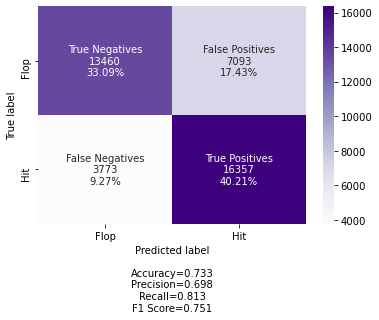

In [178]:
labels = ["True Negatives","False Positives","False Negatives","True Positives"]
categories = ["Flop", "Hit"]
make_confusion_matrix(conf_mat_logreg, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Purples")

As with the other classifiers, we calculate the accuracy, recall and F1-score for `flop` and `hit`.

This incredibly pretty confusion matrix gives us an idea of how where are most of the mispredicted values. Overall, `73.3%` of songs are correctly classified.

Our model captures `81.3%` of Actual Hits by labeling them as Hits.

Only `69.8%` of those classified as Hits are Actual Hits. As a matter of fact, 17.43% of the total of the songs are False Positives. This means that this model has a tendency to "over" classify Hits.





In [179]:
print(metrics.classification_report(table_y,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71     20553
           1       0.70      0.81      0.75     20130

    accuracy                           0.73     40683
   macro avg       0.74      0.73      0.73     40683
weighted avg       0.74      0.73      0.73     40683



##### Multi-Layer Perceptron

**Performance of the Model**

We load the pickle with the model.

In [180]:
with open('neural_final' , 'rb') as f:
    mlpf = pickle.load(f)

We compute the confusion matrix via cross validation.

In [181]:
y_pred_neur = cross_val_predict(mlpf, table_X_neurmima, table_y, cv=10)
conf_mat_neur = confusion_matrix(table_y, y_pred_neur)

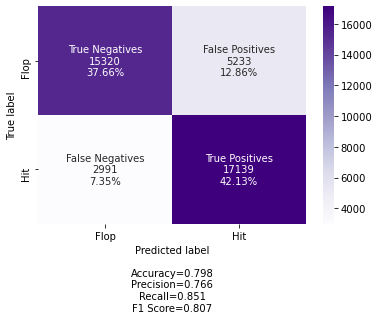

In [182]:
labels = ["True Negatives","False Positives","False Negatives","True Positives"]
categories = ["Flop", "Hit"]
make_confusion_matrix(conf_mat_neur, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Purples")

As with the other classifiers, we calculate the accuracy, recall and F1-score for `flop` and `hit`.

In [183]:
print(metrics.classification_report(table_y,y_pred_neur))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     20553
           1       0.77      0.85      0.81     20130

    accuracy                           0.80     40683
   macro avg       0.80      0.80      0.80     40683
weighted avg       0.80      0.80      0.80     40683



So far, this is the best performing model.
`79.8%` of the tracks are correctly classified, which is a good result. Out of all the tracks that were classified as hits, `77%` are actually hits. This model is capable of correctly classifying as hits `85%` of the actual hits.

We feel that this is a satisfying result.

#### Distance-based model

**Performance of the Model**

We create now the confusion matrix for evaluate the performance of KNN Classifier in predicting hit.

In [184]:
y_pred_knn = cross_val_predict(knn, table_X, table_y, cv=skf)
conf_mat_knn= sklearn.metrics.confusion_matrix(table_y,y_pred_knn)

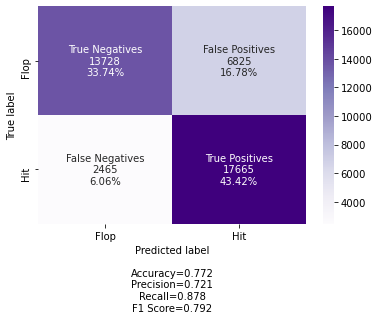

In [185]:
labels = ["True Negatives","False Positives","False Negatives","True Positives"]
categories = ["Flop", "Hit"]
make_confusion_matrix(conf_mat_knn, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Purples")

The overall accuracy of the KNN classifier is 77,2%.

The recall percentage (sensitivity) is higher and has a value of 87.8%. This is very good because it means that our classifier is able to classify almost 88% of the hit songs well.

The precision value is slightly lower (72.1%), this is due to the fact that 16.78% of the songs are mistakenly classified as hits despite being flops.

As with the other classifiers, we calculate the accuracy, recall and F1-score for flop (0) and hit (1).

In [186]:
print(metrics.classification_report(table_y,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75     20553
           1       0.72      0.88      0.79     20130

    accuracy                           0.77     40683
   macro avg       0.78      0.77      0.77     40683
weighted avg       0.79      0.77      0.77     40683



#### Probabilistic model

**Performance of the Model**

We create now the confusion matrix for evaluate the performance of `GaussianNB()` Classifier in predicting `hit`.

In [187]:
y_pred_nb = cross_val_predict(nb, table_X, table_y, cv=skf)
conf_mat_nb= sklearn.metrics.confusion_matrix(table_y,y_pred_nb)

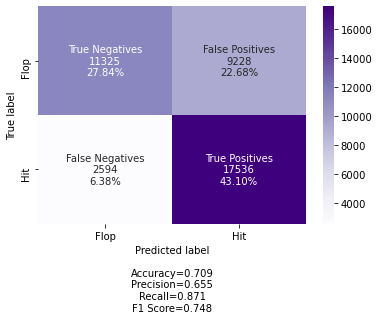

In [188]:
labels = ["True Negatives","False Positives","False Negatives","True Positives"]
categories = ["Flop", "Hit"]
make_confusion_matrix(conf_mat_nb, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Purples")

The overall accuracy of the GaussianNB() classifier is 70,9%.

The recall percentage (sensitivity) is higher and has a value of 87,1%.

The precision value is lower (65.5%), this is due to the fact that 22.68% of the songs are mistakenly classified as hits despite being flops.

As with the other classifiers, we calculate the accuracy, recall and F1-score for flop (0) and hit (1).

In [189]:
print(metrics.classification_report(table_y,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66     20553
           1       0.66      0.87      0.75     20130

    accuracy                           0.71     40683
   macro avg       0.73      0.71      0.70     40683
weighted avg       0.74      0.71      0.70     40683



### 1.1.4. Conclusions

Many of the following considerations that will be done based on the following premises. Models that predict the popularity of a song are likely to be used by music labels, musicians and, in general, people in the industry. These models can be used to identify which tracks could be a better bet market-wise.
This is exactly the reason why we feel that it could be more important to have models with a higher proportion of actual hits identified correctly.

After comparison, we believe the best model for the purposes of predicting Hit and Flop songs to be the `Multi-Layer Perceptron`. This classifier has an accuracy of `80%`.

Nonetheless, this classifier is not the best at correctly classifying the actual hits. The `K-nn classifier` has a `recall` (sensitivity) of `88%` compared to the 86% of the Multi-Layer Perceptron.

Furthermore, the use of a `DecisionTree Classifier` and` Logistic regression classifier` has allowed us to understand which are the most important variables in predicting Hit. We have seen that the results do not contradict each other.

In particular, as already anticipated by the associations found in the exploratory data analysis, the variables '`danceability`' and '` energy`' have a positive impact on hit, on the contrary '`speechiness`',` 'instrumentalness`' and '`duration_s`' have a negative impact.

# Task 1.2. (Supervised Learning) - Predicting Discrete Valence

This section will target the multiclass classification task, where the target is `DISCRETE_VALENCE`.

This variable is categorical and has values:
* **Positive**: if the valence of the song is in the interval (0.66, 1].
* **Neutral**: if the valence of the song is in the interval (0.33, 0.66].
* **Negative**: if the valence of the song is in the interval [0, 0.33].

For this purpose we will use the dataframe already prepared `data_multiclass`.

`Notes:` Our approach to coding has been to focus one classifier at a time producing the preprocessing, classifier learning and results sections. **For this reason it is advisable to run the codes of these sections ONE CLASSIFIER AT A TIME to avoid overwriting.**

### 1.2.1. Preprocessing data for classification

#### Tree model

In [190]:
multi_tree=data_multiclass.copy(deep=True)

In [191]:
dictionary=[{'col':'decade',
            'mapping':{'60s':1,'70s':2,'80s':3,'90s':4,'00s':5,'10s':6}}]
encoder=ce.OrdinalEncoder(cols='decade',mapping=dictionary)
multi_tree=encoder.fit_transform(multi_tree)
multi_tree['decade']=multi_tree['decade'].astype(int)
display(multi_tree.dtypes)

track                 object
artist                object
uri                   object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
tempo                float64
duration_s           float64
time_signature         int64
chorus_hit           float64
sections               int64
decade                 int64
hit                    int64
DISCRETE_VALENCE    category
dtype: object

In [192]:
multitree_X, multi_y, multifeatures, multitarget= starting_split(multi_tree)

#### Linear model

##### Multinomial Logistic Regression

The multinomial logistic regression can be considered an "extent" of the logistic regression in the case in which the target variable is a categorical variable with more than two categories, as in our case.
So, for this classifier we used the same logic of logistic regression.

We create a new dataset, that does not include one variable for each of the pairs that were highly correlated. We then convert `decade` and `key` into `K-1` dummies. We then put `DISCRETE_VALENCE` as the last column.

In [193]:
data_multiclass_nocorr=data_multiclass.copy(deep=True)

In [194]:
data_multiclass_nocorr=pd.get_dummies(data=data_multiclass_nocorr, 
                                      columns=['decade','key'],
                                      drop_first=True,
                                      dtype='int')
col = data_multiclass_nocorr.pop("DISCRETE_VALENCE")
data_multiclass_nocorr.insert(33, col.name, col)

In [195]:
data_multiclass_nocorr = data_multiclass_nocorr.drop(['loudness','sections','acousticness'],axis=1)

In [196]:
multi_nocorr, multi_y, multifeatures_nocorr, multitarget= starting_split(data_multiclass_nocorr)

In [197]:
multi_nocorr = minmax.fit_transform(multi_nocorr)

##### Multi-Layer Perceptron

In [198]:
data_multineur=data_multiclass.copy()
dictionary=[{'col':'decade',
            'mapping':{'60s':1,'70s':2,'80s':3,'90s':4,'00s':5,'10s':6}}]
encoder = ce.OrdinalEncoder(cols='decade',mapping=dictionary)
data_multineur = encoder.fit_transform(data_multineur)
data_multineur['decade']=data_multineur['decade'].astype(int)          

In [199]:
col = data_multineur.pop("DISCRETE_VALENCE")
data_multineur.insert(19, col.name, col)

In [200]:
multi_X_neur, multi_y, multifeatures, multitarget= starting_split(data_multineur)

In [201]:
minmax=MinMaxScaler()
multi_X_neurmima=minmax.fit_transform(multi_X_neur)

#### Distance-based model & Probabilistic model

In [202]:
multi_X, multi_y, features, target= starting_split(data_multiclass)

We decide to encode the categorical variable 'decade' and with one hot encoder (OHE) for using it for these models.

In [203]:
#encode decade with OHE
num_of_rows = multi_X.shape[0]
multi_X = ohe_encode_feature(multi_X, 14, num_of_rows, 6)

In [204]:
#convert the type of multi_X: type float
multi_X = np.array(multi_X, dtype=float)

### 1.2.2 Learning Classifiers

#### Tree model

We will use a minmax scaler as it found the best for our data in the decision tree category.

In [ ]:
trans=MinMaxScaler()
multitree_X=trans.fit_transform(multitree_X)

Unlike binary classification, the classes of the variable `DISCRETE_VALENCE` are not perfectly balanced. As we saw in task 0, the `Negative` category is present at 25%, while the other two at 37%.

For this reason we choose a **Balanced Random forest classifier**.

We'll use a **RandomizedSearchCV** in order to find the best combination of the parameters.

The parameters we want to test are:
* `n_estimators`: that are the number of trees in the forest;
* `max_depth`: The maximum depth of the tree; 
* `min_samples_split`: Minimum number of samples required to split a node;
* `min_samples_leaf`: The minimum number of samples required to be at a leaf node;
* `bootstrap`: Method of selecting samples for training each tree. Bootstrap = True it means bootstrap samples are used when creating trees.

In [ ]:
n_estimators = [10,50,100]
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
min_samples_split = [15, 30, 50]
min_samples_leaf = [5, 10, 15]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
rf = BalancedRandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,scoring='accuracy',cv = skf, verbose=2, random_state=1, n_jobs = -1)
rf_random.fit(multitree_X, multi_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=BalancedRandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 22, 26, 30,
                                                      34, 38, 42, 46, 50,
                                                      None],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [15, 30, 50],
                                        'n_estimators': [10, 50, 100]},
                   random_state=0, scoring='accuracy', verbose=2)

These are the optimal parameters for our Balanced Random Forest Classifier.

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 100}

We'll take the best estimator already fitted.

In [ ]:
bestrf=rf_random.best_estimator_

#### Linear model

##### Multinomial Logistic Regression

As in the logistic regression, the optimal parameters to choose are:
* `penalty`: It can take the values `'l1’`, `‘l2’`, `‘elasticnet’` or it can have no value.

* `C`: Lower values imply stronger regularization, which shrink the coefficient estimates.

* `solver`: It ranges from a variety of possible algorithms, from `'liblinear'` which is good for small datasets, although limited for one vs rest schemes.
`'saga'`and `'sag'` are fast even with larger sets of data, and can be employed in multiclass problems, such as `‘newton-cg’` and the sklearn model default `'lbfgs'`. 

Not every solver and every penalty are compatible with each other, so we wanted to be nice to our computers and spare them the effort to search for models with incompatible hyperparameters. The compatibilities can be found [here](https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression).

In [ ]:
multiregparameters =[
                     {"penalty": ["l2"], "C": [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6], "solver":["lbfgs","newton-cg","sag"]},
                     {"penalty": ["l1"], "C": [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6], "solver":["saga"]},
                     {"penalty": ["none"], "solver":["lbfgs","newton-cg","sag"]}
                     ]

In [ ]:
multilogreggrid = GridSearchCV(LogisticRegression(multi_class="multinomial", 
                                                  max_iter=10000), 
                               multiregparameters, 
                               cv=10)
results_mlr = multilogreggrid.fit(multi_nocorr, multi_y)

In [ ]:
print(results_mlr.best_params_)
print(results_mlr.best_score_)
bestmultilogreg=results_mlr.best_estimator_

{'penalty': 'none', 'solver': 'newton-cg'}

In [ ]:
with open('bestmultilogreg', 'wb') as files:
    pickle.dump(bestmultilogreg, files)

In [ ]:
multiscores = cross_val_score(bestmultilogreg, multi_nocorr, multi_y, cv=10, scoring='accuracy')

In [ ]:
print("Accuracy of the classifier",mean(multiscores))
print("Standard deviation of the classifier",multiscores.std())

Accuracy of the classifier 0.616377946257926
Standard deviation of the classifier 0.04017612301045772


##### Multi-layer Perceptron

The choice of the optimal parameters and their explanation are the same as we have already described in the "binary classification" section.

As in the case of binary classification, we fix the `max_iter` value and the `solver`.

In [ ]:
multimlp=MLPClassifier(max_iter=10000, solver="adam")

In [ ]:
multi_param = {
    'activation': ['tanh', 'relu'],
    'hidden_layer_sizes':[100,200]
}
clsearch = GridSearchCV(multimlp, multi_param, n_jobs=-1, cv=10)

In [ ]:
clsearch.fit(multi_X_neurmima, multi_y)

In [ ]:
print(clsearch.best_score_)
print(clsearch.best_params_)

We keep `hidden_layer_sizes=200`, but we further test other options for the `activation` function.

In [ ]:
multimlp1=MLPClassifier(max_iter=10000, solver="adam", hidden_layer_sizes=200)

In [ ]:
multi_param1 = {
    'activation': ['logistic', 'identity']
}
clsearch1 = GridSearchCV(multimlp1, multi_param1, n_jobs=-1, cv=10)

In [ ]:
clsearch1.fit(multi_X_neurmima, multi_y)

In [ ]:
print(clsearch1.best_score_)
print(clsearch1.best_params_)

We retain the `relu` function as the `activation` function and we now test different values of `alpha`.

In [ ]:
multimlp2 = MLPClassifier(max_iter=10000, 
                          solver="adam", 
                          hidden_layer_sizes=200, 
                          activation="logistic")
multi_param2 = {
    "alpha": [0.0001,0.001,0.01,0.1,1]
}
clsearch2 = GridSearchCV(multimlp2, multi_param2, n_jobs=-1, cv=10)

In [ ]:
clsearch2.fit(multi_X_neurmima, multi_y)

In [ ]:
print(clsearch2.best_score_)
print(clsearch2.best_params_)
multimlpf=clsearch.best_estimator_

In [ ]:
with open('multi_mlpf', 'wb') as files:
    pickle.dump(multimlpf, files)

We now have our final model with all the fine-tuned hyperparameters.

In [ ]:
mlpf_scores = cross_val_score(multimlpf, multi_X_neurmima, multi_y, cv=10,scoring='accuracy')
print("Accuracy of the classifier",mlpf_scores)
print("Standard deviation of the classifier",mlpf_scores.std())

#### Distance-based model

##### KNN as classifier

**In** this section we will follow the same logic we used when we predicted `hit`.

In [ ]:
robust = RobustScaler()
multi_X = robust.fit_transform(multi_X)

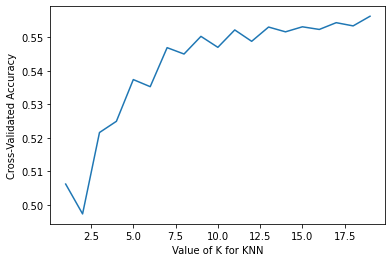

In [ ]:
%matplotlib inline
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, multi_X, multi_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

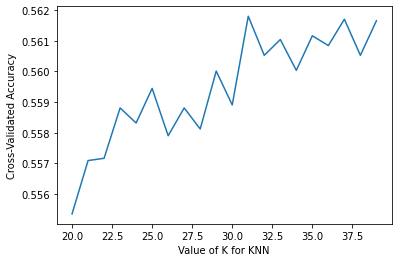

In [ ]:
%matplotlib inline
k_range = range(20, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, multi_X, multi_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

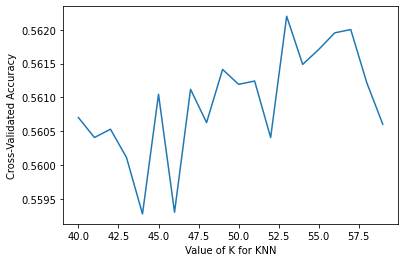

In [ ]:
%matplotlib inline
k_range = range(40, 60)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, multi_X, multi_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

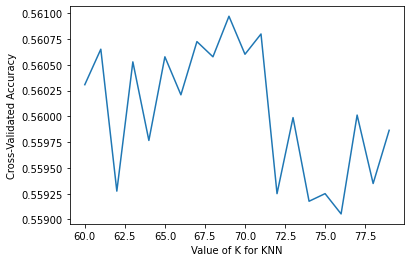

In [ ]:
%matplotlib inline
k_range = range(60, 80)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, multi_X, multi_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

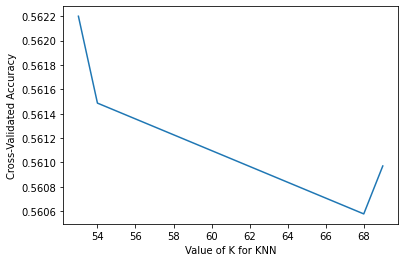

In [ ]:
%matplotlib inline
k_range = [53,54,68,69]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, multi_X, multi_y,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Increasing the value of `k` the accuracy always tends to decrease for `k` greater than 80.
In conclusion, we choose `k = 53` (maximum pick) and apply a Stratified K Fold to avoid problems of class imbalance within the folds created.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=53)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
knn_scores = cross_val_score(knn, multi_X, multi_y, cv=skf,scoring='accuracy')
print("Accuracy of the classifier",knn_scores)
print("Standard deviation of the classifier",knn_scores.std())

Accuracy of the classifier [0.61980831 0.60629147 0.62128287 0.61234022 0.60988201 0.60791544
 0.60349066 0.61406096 0.61996067 0.60619469]
Standard deviation of the classifier 0.006120405427686042


We saw that we don't have big differences changing the type of scalers and we chose to use StandardScaler().

In [ ]:
stand=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn = KNeighborsClassifier(n_neighbors=53)

print('MinMax scaler:')
multi_X=minmax.fit_transform(multi_X)
print(cross_val_score(knn, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
multi_X=robust.fit_transform(multi_X)
print(cross_val_score(knn, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
multi_X=stand.fit_transform(multi_X)
print(cross_val_score(knn, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.6057568339941323
Robust scaler:
0.6139662962374942
Standard scaler:
0.6125653881555942


#### Probabilistic model

Like in binary classification, we'll compare the `GaussianNB()` with `BernoulliNB()`.

##### Naive Bayes with GaussianNB as classifier

We see that using different scalers does not change the accuracy.

In [215]:
nb = GaussianNB()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
stand=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler()
print('MinMax scaler:')
multi_X=minmax.fit_transform(multi_X)
print(cross_val_score(nb, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
multi_X=stand.fit_transform(multi_X)
print(cross_val_score(nb, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
multi_X=robust.fit_transform(multi_X)
print(cross_val_score(nb, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.5496641694293593
Standard scaler:
0.5496641694293593
Robust scaler:
0.5496641694293593


##### Naive Bayes with BernoulliNB as classifier

In this case, we saw that with the Robust scaler we have the best accuracy score.

In [216]:
bern = BernoulliNB()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
print('MinMax scaler:')
multi_X=minmax.fit_transform(multi_X)
print(cross_val_score(bern, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Standard scaler:')
multi_X=stand.fit_transform(multi_X)
print(cross_val_score(bern, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

print('Robust scaler:')
multi_X=robust.fit_transform(multi_X)
print(cross_val_score(bern, multi_X, multi_y, cv=skf,scoring='accuracy').mean())

MinMax scaler:
0.45655440214800097
Standard scaler:
0.5523926863376665
Robust scaler:
0.552982711210962


Contrary to what we saw in the binary classification, in this case we'll prefer `BernoulliNB()` with a Robust scaling as a classifier for `DISCRETE_VALENCE`.




### 1.2.3 Classification - Results and Discussion 

As in the case of binary classification, we will evaluate the performance of the various classifiers by constructing the confusion matrices and analyzing the metrics already described.

In the case of our multiclass classification, in each confusion matrix we'll call:
* `TP{Negative}`: the number of actual songs with 'DISCRETE_VALENCE = Negative' correctly classified as Negative.
* `TP{Neutral}`: the number of actual songs with 'DISCRETE_VALENCE = Neutral' correctly classified as Neutral.
* `TP{Positive}`: the number of actual songs with 'DISCRETE_VALENCE = Positive' correctly classified as Positive.


Also in this case we used the `make_confusion_matrix` function to create the confusion matrices.

#### Tree model

**Importance of the Features**

Now let's see what are the most important variables in predicting `DISCRETE_VALENCE` according to the Balanced Random Forest Classifier.

In [ ]:
feature_importances = pd.DataFrame(bestrf.feature_importances_,
                                       index = multifeatures,
                                        columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
danceability        0.270015
energy              0.177929
decade              0.086908
duration_s          0.070202
acousticness        0.066568
loudness            0.063685
instrumentalness    0.056803
speechiness         0.052672
tempo               0.051464
liveness            0.038120
sections            0.016898
hit                 0.015239
key                 0.015021
chorus_hit          0.009271
time_signature      0.005485
mode                0.003721


Now we'll see graphically the importance of each feature.

Text(0.5, 1.0, 'Importance of each feature in predicting DISCRETE_VALENCE')

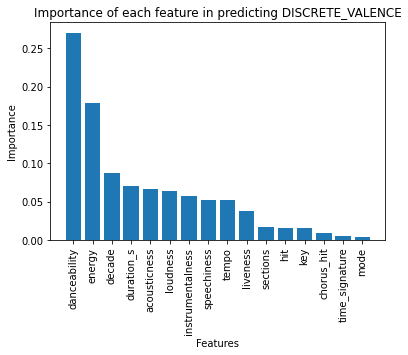

In [ ]:
plt.figure()
plt.bar(feature_importances.index.values,feature_importances['importance'])
plt.xticks(feature_importances.index.values,rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Importance of each feature in predicting DISCRETE_VALENCE')

The most important variables in predicting `DISCRETE_VALENCE` according to the Balanced Random Forest Classifier are `danceability` and `energy`.

This is not only consistent with what we found in the correlations and association rules, but it is also an acceptable result from a logical point of view, as we usually associate a song with Positive Valence as joyful.


**Performance of the Model**

In [ ]:
y_pred_randomtree = cross_val_predict(bestrf,multitree_X, multi_y, cv=10)
conf_mat_multitree = confusion_matrix(multi_y, y_pred_randomtree)

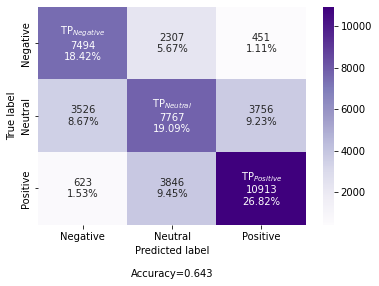

In [ ]:
multilabels=["TP$_{Negative}$","","","","TP$_{Neutral}$","","","","TP$_{Positive}$"]
multicategories=["Negative", "Neutral", "Positive"]
make_confusion_matrix(conf_mat_multitree,
                      group_names=multilabels,
                      categories=multicategories,
                      cmap="Purples")

The overall accuracy of our Balanced Random Forest classifier is 64,3%.

It's important in the case of multiclass classification to analyze the metrics per class.

In [ ]:
print(metrics.classification_report(multi_y,y_pred_randomtree))

              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68     10252
     Neutral       0.56      0.52      0.54     15049
    Positive       0.72      0.71      0.72     15382

    accuracy                           0.64     40683
   macro avg       0.64      0.65      0.65     40683
weighted avg       0.64      0.64      0.64     40683



Regarding recall metrics by class, our classifier can predict 73% of actual songs with discrete valence equal to negative. Songs with valence greater than 0.66 are also classified well with a percentage of around 71%.

The classifier performs worse at classifying songs with neutral valence and this can be seen from the precision, recall and F1 score percentages for that class.

Regarding precision, the highest percentage is for the class DISCRETE_VALENCE = Positive (72%) and, in this case, the classifier erroneously classifies 10.34% of the songs as Positive valence.

#### Linear model

Firstly, we load the model from the pickle.

In [205]:
with open('bestmultilogreg', 'rb') as f:
  bestmultilogreg = pickle.load(f)

##### Multinomial Logistic Regression

**Importance of the Features**

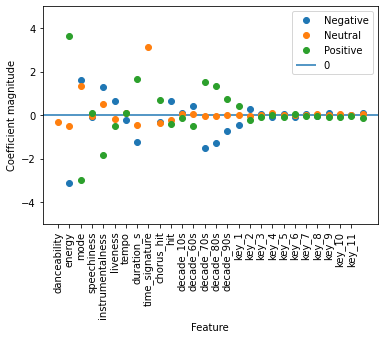

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(bestmultilogreg.coef_.T, 'o')

plt.xticks(range(multi_nocorr.shape[1]), multifeatures_nocorr, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(labels=["Negative","Neutral","Positive","0"])

The coefficients with the highest magnitude are `energy`, `loudness` and `tempo`. 
The graph shows that, in regard to these variables, the magnitudes between Positive and Negative are usually similar in module, but with opposite signs.

This absolutely makes sense, given that we expect songs with higher tempo and energy to be Positive and songs with lower tempo and energy to be Negative. Same thing goes for loudness, but with the reminder that the variable has negative values.

`speechiness` is another variable where we can clearly appreciate the polarization: Positive is negatevely related to it, while Negative is positively related to it.

The only significant coeffieicnt for `duration` is the one related to Neutral valence. This coefficient is high and positive.

Some interesting coefficients are the ones of `decade_10s` and `decade_60s`, but interpretation cannot be made in absolute value, it can only be be made taking into account that the baseline is `decade_00s`.

Interestingly enough, `hit` doesn't have coefficients with sufficient magnitude to be considered interesting.

**Performance of the Model**

In [208]:
y_pred_multilogreg = cross_val_predict(bestmultilogreg, multi_nocorr, multi_y, cv=10)
conf_mat_multilogreg = confusion_matrix(multi_y, y_pred_multilogreg)

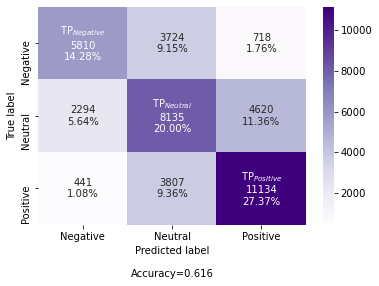

In [209]:
multilabels=["TP$_{Negative}$","","","","TP$_{Neutral}$","","","","TP$_{Positive}$"]
multicategories=["Negative", "Neutral", "Positive"]
make_confusion_matrix(conf_mat_multilogreg,
                      group_names=multilabels,
                      categories=multicategories,
                      cmap="Purples")

In [210]:
print(metrics.classification_report(multi_y,y_pred_multilogreg))

              precision    recall  f1-score   support

    Negative       0.68      0.57      0.62     10252
     Neutral       0.52      0.54      0.53     15049
    Positive       0.68      0.72      0.70     15382

    accuracy                           0.62     40683
   macro avg       0.63      0.61      0.62     40683
weighted avg       0.62      0.62      0.62     40683



The overall accuracy indicates that out of the dataset, `61.9%` are correctly classified. 
Out of those Predicted as `Positive`, `68%` are actually `Positive`. A similar result is obtained for those songs with `Negative` Valence.
Out of those songs Predicted as `Neutral`, `52%` are actually `Neutral`.

The model can better predict songs that are considered Positive, given that `72%` of them are identified.

##### Multi-Layer Perceptron

In [211]:
with open('multi_mlpf', 'rb') as f:
  multimlpf = pickle.load(f)

**Performance of the Model**

We print the confusion matrix to evaluate the performance of our final model.

In [212]:
y_pred_multineur = cross_val_predict(multimlpf, multi_X_neurmima, multi_y, cv=10)
conf_mat_multineur = confusion_matrix(multi_y, y_pred_multineur)

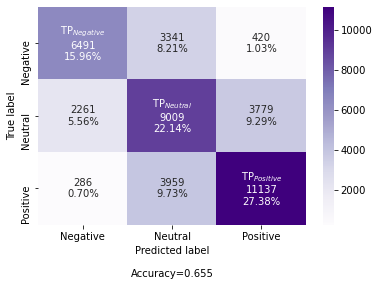

In [213]:
multilabels=["TP$_{Negative}$","","","","TP$_{Neutral}$","","","","TP$_{Positive}$"]
multicategories=["Negative", "Neutral", "Positive"]
make_confusion_matrix(conf_mat_multineur,
                      group_names=multilabels,
                      categories=multicategories,
                      cmap="Purples")

As with the other classifiers, we calculate the accuracy, recall and F1-score for each category.

In [214]:
print(metrics.classification_report(multi_y,y_pred_multineur))

              precision    recall  f1-score   support

    Negative       0.72      0.63      0.67     10252
     Neutral       0.55      0.60      0.57     15049
    Positive       0.73      0.72      0.73     15382

    accuracy                           0.65     40683
   macro avg       0.67      0.65      0.66     40683
weighted avg       0.66      0.65      0.66     40683



`65%` of the tracks are correctly classified. The model performs better in predicting Positive and Negative tracks, rather than the Neutral ones. 

Practically speaking, out of all the Positive tracks, `72%` are identified by the model and out of all the Negative tracks, `63%` are identified.
Only `60%` of the Neutral tracks are identified. This is understandable, given that a more rigorous definition of a Positive or Negative track can be stated, whereas a Neutral track might not have well defined characteristics.


The most precise classification is the one of Positive and Negative tracks. `73%` of those identified as Positive are actually Positive and `72%` of those identified as Negative are actually Negative, whereas `55%` of the tracks classified as Neutral are actually Neutral.

Another good news is that only `2%` of the whole dataset of tracks are classified with the opposite label, which further confirms that most of the prediction inaccuracies happen between Positive and Neutral and Negative and Neutral.

#### Distance-based model

**Performance of the Model**

We print the confusion matrix to evaluate the performance of K-nn classifier.

In [ ]:
y_pred_mknn = cross_val_predict(knn,multi_X, multi_y, cv=skf)
conf_mat_mknn= sklearn.metrics.confusion_matrix(multi_y,y_pred_mknn)

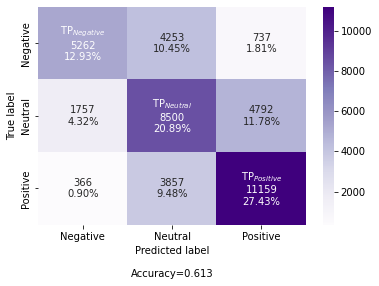

In [ ]:
multilabels=["TP$_{Negative}$","","","","TP$_{Neutral}$","","","","TP$_{Positive}$"]
multicategories=["Negative", "Neutral", "Positive"]
make_confusion_matrix(conf_mat_mknn,
                      group_names=multilabels,
                      categories=multicategories,
                      cmap="Purples")

The overall accuracy of our KNN classifier is 61,3%.

As with the other classifiers, we calculate the accuracy, recall and F1-score per class.

In [ ]:
print(metrics.classification_report(multi_y,y_pred_mknn))

              precision    recall  f1-score   support

    Negative       0.71      0.51      0.60     10252
     Neutral       0.51      0.56      0.54     15049
    Positive       0.67      0.73      0.70     15382

    accuracy                           0.61     40683
   macro avg       0.63      0.60      0.61     40683
weighted avg       0.62      0.61      0.61     40683



Overall, looking at the F1 score values, the best classified class is the one with discrete valence = positive, while the worst classified class is the one with discrete valence = neutral.

73% (recall) of the actual songs with discrete valence = positive are correctly classified by the classifier. The classifier erroneously classifies 13.79% of the songs as Positive valence (precision = 67%).

#### Probabilistic model

**Performance of the Model**

We print the confusion matrix to evaluate the performance of `BernoulliNB()` classifier.

In [217]:
y_pred_bern = cross_val_predict(bern, multi_X, multi_y, cv=skf)
conf_mat_bern = sklearn.metrics.confusion_matrix(multi_y,y_pred_bern)

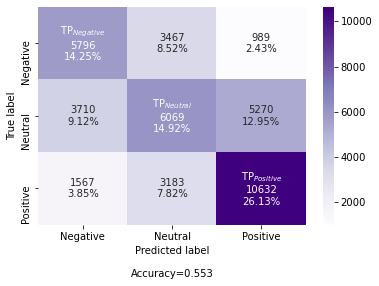

In [218]:
multilabels=["TP$_{Negative}$","","","","TP$_{Neutral}$","","","","TP$_{Positive}$"]
multicategories=["Negative", "Neutral", "Positive"]
make_confusion_matrix(conf_mat_bern,
                      group_names=multilabels,
                      categories=multicategories,
                      cmap="Purples")

The overall accuracy of our BernoulliNB() classifier is 55,3%.

As with the other classifiers, we calculate the accuracy, recall and F1-score for each category.

In [220]:
print(metrics.classification_report(multi_y,y_pred_bern))

              precision    recall  f1-score   support

    Negative       0.52      0.57      0.54     10252
     Neutral       0.48      0.40      0.44     15049
    Positive       0.63      0.69      0.66     15382

    accuracy                           0.55     40683
   macro avg       0.54      0.55      0.55     40683
weighted avg       0.55      0.55      0.55     40683



This classifier fails to classify songs with discrete valence = Neutral (f1 score = 0.44).

The class that manages to classify in the best way is the one with discrete valence = Positive (70% of recall and 62% of precision).

### 1.2.3 Conclusions

One again, the winner in terms of accuracy is the Multi-Layer Perceptron, with an accuracy of `65%`. Given that this is a multi-class classification, we cannot only focus on precision or recall, because we don't really have a hierarchy of which songs we'd like to predict better. 

We can, however, say that we can tolerate more mistakes made between Positive and Neutral and Negative and Neutral; that is: songs that are Neutral classified as Positive or Negative and songs that Positive or Negative classified as Neutral. This means that the mistakes we are less willing to tolerate are the ones made between Positive and Negative, so songs that are Positive classified as Negative and Negative songs classfied are Positive.

To this respect, we can say that the best performing classifier is once again the Multi Layer Perceptron, given that the "opposite label" mistakes are only `1.99%` of the whole dataset.

So, we choose the MLP and we toss all the others in our digital bin? Not so fast.

MLP gives us no insight as to what happens inside the model. This is exactly the reason why we would advise to also consult the Random Forest, which is important to give the features importance and it has a satisfying accuracy of `64.3%`. Another important model in terms of interpretation is the Multinomial Logit, which not only gives us the importance of the features, but also the sign of the relation between the Valence and the features. This can surely prove useful to those in the industry.

If, for any reason, we would be more interested in different metrics, we will provide a list of the best performing model given the different metrics.


*   Recall for Negative Valence: Random Forest, `73%`;
*   Recall for Positive Valence: MLP and Distance-Based Model, `73%`
*   Precision for Negative Valence: Distance-Based Model, `71%`;
*   Precision for Positive Valence: Random Forest, `72%`;

# 3. Final Comments and Conclusions

This project turned out to be a satisfying challenge, above all expectations. This is mostly because in the beginning we were feeling a little lost and bewildered by the amount of tasks and the decisions that we had to take, unsure that we had the skills to take said decisions.

We had to question ourselves more than once, asking ourselves if we were going on the right path, under the wrong impression that there was no turning back on the code written. This was wildly inaccurate. The code was written, re-written, written a number of times above max_iter. But, somewhere on the road, we gained more and more confidence in ourselves. Before getting started, we thought that gaining confidence only meant being able to run code with no errors. Well, today we can say that confidence is coding is the ability to self correct, the adrenaline rush to re-run the code without hiccups after all the setbacks. 

No conclusions to this project could be _conclusive_ enough without thanking Professor Branco and Professor Teixeira for being so patient with us. But also we want to realistically thank all the heroes of Stack Overflow for the useful tips.

We can confidently say that with the previously tested models, we can make predictions about which songs are hits or flops, as well as predicting Discrete Valence and learning more from our data through unsupervised learning methods.
Predictions for binary classification were somewhat easier and better performing than those for multiclass classification. 

